<a href="https://colab.research.google.com/github/Mr-Himanshu123/ML_Project-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**Project Name**    - **NYC Taxi Trip Time Prediction**</font>



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -**   Himanshu Rathod


<img src='https://media.tenor.com/Ugjpo2Td2g4AAAAM/taxi-verona-padova.gif' align='centre'/>

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
## Import Libraries
#Libraries for analysis and visualization
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

#Library of warning would assist in ignoring warning
import warnings
warnings.filterwarnings('ignore')

#importing datetime libraries and
from datetime import datetime
import datetime

#library used to calculate distance from geographical coordinates
from geopy.distance import great_circle

#Import neccesary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm

#importing libraries for ML-model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# import lightgbm
# from lightgbm import LGBMRegressor

#libraries to save the model
# import pickle

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
nyc_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter Projects/ML(1)-TAxi time prediction/Data & Resources/NYC Taxi Data.csv')

### Dataset First View

In [5]:
# Dataset First Look
pd.set_option('display.max_columns',None)
nyc_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
row_count=len(nyc_data.index)
column_count=len(nyc_data.columns)
print(f'No. of rows={row_count}')
print(f'No. of columns={column_count}')

#Also we can count in tuple using function
print('\n')
nyc_data.shape

No. of rows=1458644
No. of columns=11




(1458644, 11)

### Dataset Information

In [7]:
# Dataset Info
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_value_count=nyc_data.duplicated().sum()
duplicate_value_count

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_value_count=nyc_data.isnull().sum()
missing_value_count

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: >

<Figure size 2000x2000 with 0 Axes>

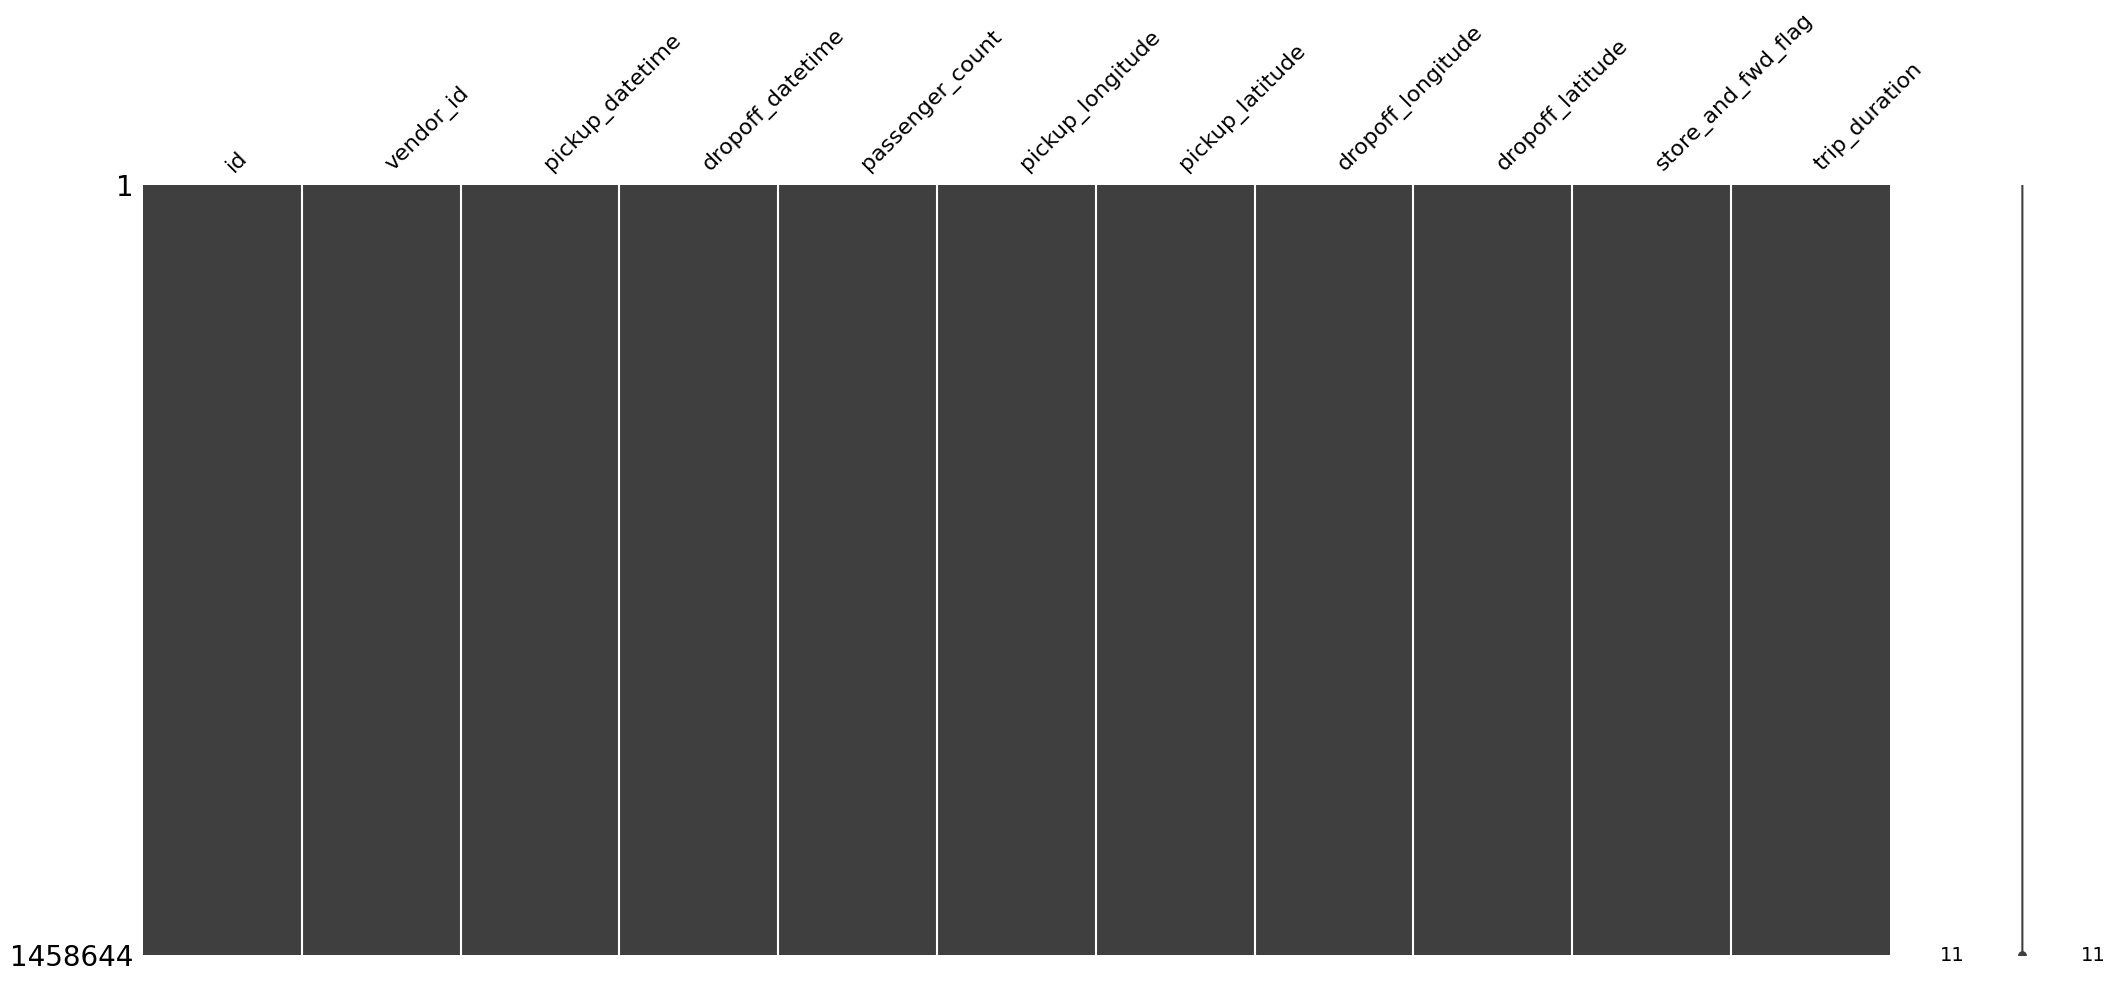

In [10]:
# Visualizing the missing values
plt.figure(figsize=(20,20))
msno.matrix(nyc_data)

From the above matix plot visualization we can see that there is no missing values in NYC Data And Also there is no duplicate value present from the 1458644 attributes.

### What did you know about your dataset?

**First, lets define what information the columns contains using inspection**   

The NYC dataset consist of 148644 rows and 11 features in it.

**(i)id -**  A unique identifier for each trip.

**(ii)vendore_id -** A code indicating the provider associated with the trip record.  

**(iii)pickup_datetime -** Date and time when the meter was engaged.   

**(iv)dropoff_datetime -** Date and time when the meter was disengaged.  

**(v)passenger_count -** The number of passengers in the vehicle. (driver entered value)

**(vi)pickup_latitude -** The latitude where the meter was engaged.      
**(vii)dropoff_longitude -** The longitude where the meter was disengaged.

**(viii)dropoff_latitude -** The latitude where the meter was disengaged.        

**(ix)store_and_fwd_flag -** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server -       
Y=store and forward       
N=not a store and forward trip        

**(x)trip_duration -** duration of the trip in seconds.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
nyc_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
# Dataset Describe
nyc_data.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

Answer Here-From the above analysis we can see that only these 7 columns are numericals and other are categorical. In which passenger_count columns varies from 0-9 and trip_duration maximum value is 3526282 seconds approx 979.5 hours and minimun value is 1 second, which shows outilier present in these feature.

<Axes: >

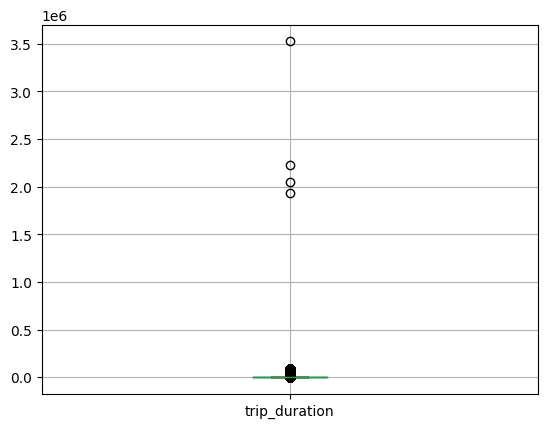

In [13]:
#Outlier Check with respect to trip_duration column
nyc_data.boxplot(column=['trip_duration'])

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
nyc_data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

In [16]:
print(nyc_data.isnull().sum())
print('\n')
print(f'Duplicate value count-{nyc_data.duplicated().sum()}')

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Duplicate value count-0


### 3.1 Timestamp Conversion

In [17]:
#Formate check
nyc_data['pickup_datetime'][0]

'2016-03-14 17:24:55'

In [18]:
#Convert timestamp to datetime formate to fetch the other details
nyc_data['pickup_datetime']=pd.to_datetime(nyc_data['pickup_datetime'])
nyc_data['dropoff_datetime']=pd.to_datetime(nyc_data['dropoff_datetime'])
nyc_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [19]:
#Extracting days from the pickup_datetime and dropoff_datetime
nyc_data['pickup_day']=nyc_data['pickup_datetime'].dt.day_name()
nyc_data['dropoff_day']=nyc_data['dropoff_datetime'].dt.day_name()

In [20]:
#Also Extracting month from the pickup_datetime and dropoff_datetime
nyc_data['pickup_month']=pd.DatetimeIndex(nyc_data['pickup_datetime']).month
nyc_data['dropoff_month']=pd.DatetimeIndex(nyc_data['pickup_datetime']).month

In [21]:
#And now extracting time from the pick_datetime and dropoff_datetime
nyc_data['pickup_hour']=nyc_data['pickup_datetime'].dt.hour
nyc_data['dropoff_hour']=nyc_data['dropoff_datetime'].dt.hour

In [22]:
#View of data
nyc_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,13


In [23]:
#Checking dtypes of the features
nyc_data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_month                   int64
dropoff_month                  int64
pickup_hour                    int64
dropoff_hour                   int64
dtype: object

In [24]:
nyc_data['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [25]:
nyc_data['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

### 3.2 Coordinates Conversion Into Distance

In [26]:
#defining a function to take coordinates as inputs and return us distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  '''
  returns distance in km
  '''
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

In [27]:
#Creating distance column in dataset in km
nyc_data['distance']=nyc_data.apply(lambda x:cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

###3.3 Exploring Duration Time Column

In [28]:
#Creating duration time column for the better analysis in hours
bins=np.array([0,1800,3600,5400,7200,90000])
nyc_data['duration_time']=pd.cut(nyc_data.trip_duration,bins,labels=["<5","5-10","10-15","15-20",">20"])


###3.4 Manipulating Datetime

In [29]:
#Creating a function which gives time zone
def timezone(x):
  if x>=datetime.time(4,0,1) and x<=datetime.time(10,0,0):
    return 'morning'
  elif x>=datetime.time(10,0,1) and x<=datetime.time(16,0,0):
    return 'midday'
  elif x>=datetime.time(16,0,1) and x<=datetime.time(22,0,0):
    return 'evening'
  elif x>=datetime.time(22,0,1) or x<=datetime.time(4,0,0):
    return 'late night'


In [30]:
#Creating pickup_timezone and dropoff_timezone columns
nyc_data['pickup_timezone']=nyc_data['pickup_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
nyc_data['dropoff_timezone']=nyc_data['dropoff_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

### What all manipulations have you done and insights you found?

* As per the analysis we can say that data does not contains any missing value and duplicate value in it.

* Columns pickup_datetime and dropoff_datetime available in string, so we had converted it into numerical values because we cannot generate any aspect from it.

* From timestamp columns manipulate two columns that are pickup_day and dropoff_day for data visualization in proper way.

* And from pickup_day and dropoff_day we can see that Friday has highest number of value counts, which indicates that majority of travelling more due to weekends.

* Extracting distance column in kilometer from coordinates in the data which gives distance between two points.

* From pickup_hour and dropoff_hour of the day distributing the timezones. The time part is represented bu hours, minutes, and seconds which is difficult for the analysis thus we divide the times into 4 times zones: **morning** (4 hrs to 10 hrs), **midday** (10 hrs to 16 hrs), **evening** (16 hrs to 22 hrs) and **late night** (22 hrs to 4 hrs).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**4.1 Univariate Analysis**

#### Chart - 1

###**Analysis of passenger count column**


In [30]:
#passenger_count column value counts
nyc_data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Dist of passenger count')

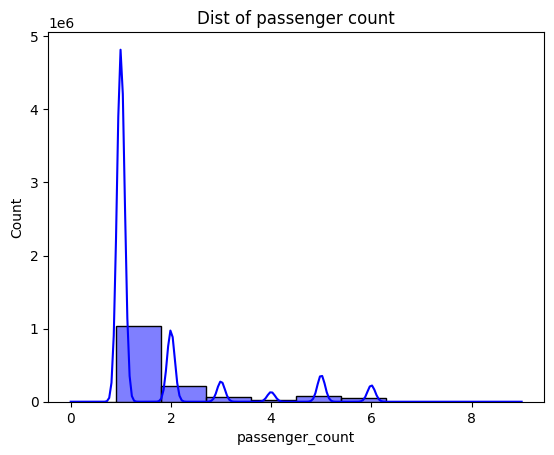

In [31]:
# Chart - 1 visualization code
ax=sns.histplot(x=nyc_data['passenger_count'],data=nyc_data,kde=True,bins=10,color='blue')
plt.title('Dist of passenger count')

##### 1. Why did you pick the specific chart?

Using hist plot we can easily understand about column using bars which provides counts of passenger in perticular trip.

##### 2. What is/are the insight(s) found from the chart?

From this analysis we can see that most number of passenger travel alone, approx more than 10 lakhs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that more than 10lakhs passenger travel alone which may somehow increase the bookings but more the taxi cars in market cause traffic as well polution.

#### Chart - 2

###**Visualization of pickup days and dropoff days**

Text(0.5, 1.0, 'Dropoffs as per week days')

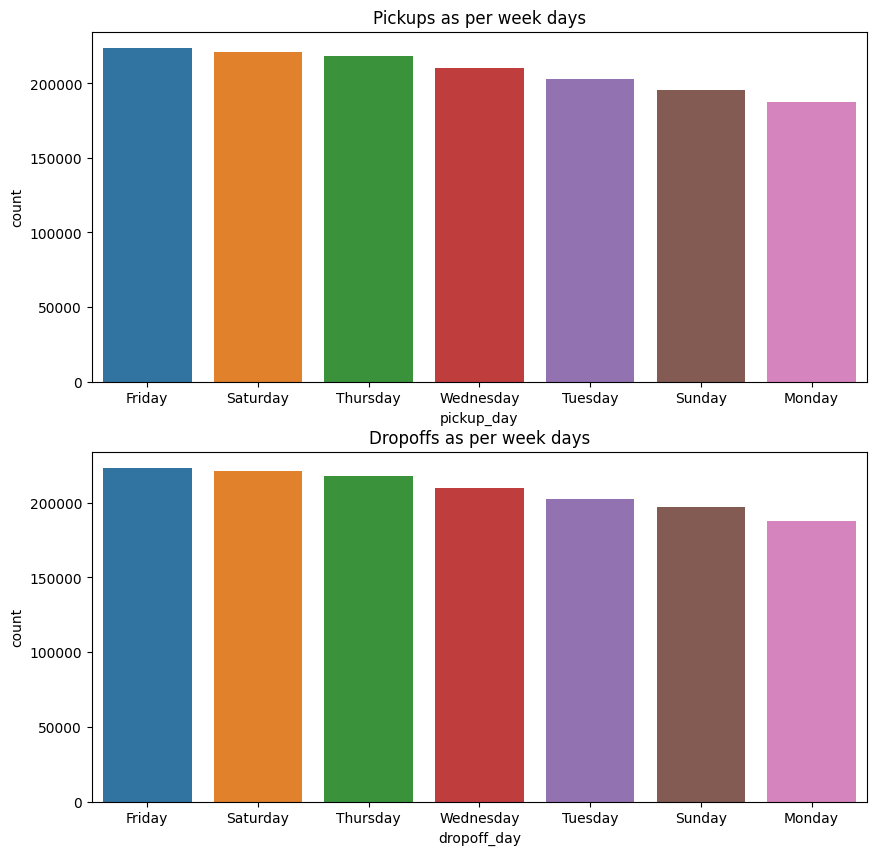

In [32]:
# Chart - 2 visualization code
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=nyc_data,ax=ax[0],order=nyc_data['pickup_day'].value_counts().index)
ax[0].set_title('Pickups as per week days')

sns.countplot(x='dropoff_day',data=nyc_data,ax=ax[1],order=nyc_data['dropoff_day'].value_counts().index)
ax[1].set_title('Dropoffs as per week days')

##### 1. Why did you pick the specific chart?

Distribution of week days very-well explained through bars through which we can see total overview with these.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we can say that friday have majority and monday has least number of travelling in dropoffs as well as pickups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As per the analysis, due to weekends people loved to travel out on friday for food,picnics,movies,etc. And in busy or workday like monday and others has lesser trips.

#### Chart - 3

###**Analysis of vendor ID**

In [33]:
#vendor_id column
nyc_data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [34]:
#percentage of trip by venderID
percentage_vender1=round(len(nyc_data[nyc_data['vendor_id']==1])/len(nyc_data)*100,1)
percentage_vender2=round(len(nyc_data[nyc_data['vendor_id']==2])/len(nyc_data)*100,1)
total_percentage=[percentage_vender1,percentage_vender2]
total_percentage

[46.5, 53.5]

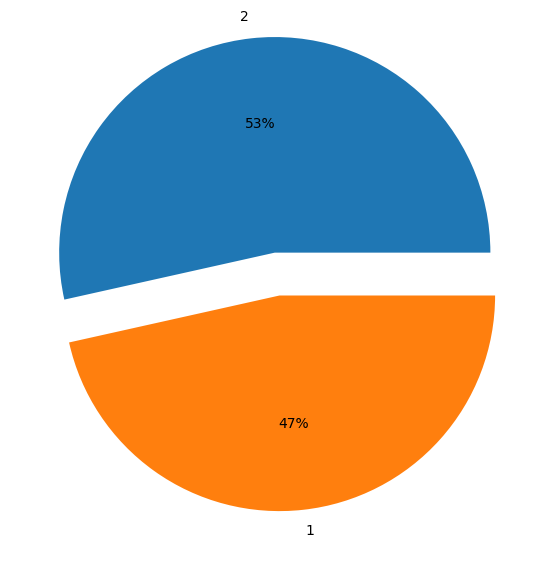

In [35]:
# Chart - 3 visualization code
fig,ax=plt.subplots(1,1,figsize=(12,7))
ax.pie(x=nyc_data['vendor_id'].value_counts(),labels=nyc_data['vendor_id'].value_counts().index,explode=[0.2,0],autopct='%1.0f%%')

plt.show()

##### 1. Why did you pick the specific chart?

Vendor ID contains categorical values in it so, pie chart is a appropriate way to understand them.

##### 2. What is/are the insight(s) found from the chart?

Vendor ID (=2) has highest number of bookings approx 54%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Both have close ratio to 50% and has equal weightage to growth perspective.

#### Chart - 4

###**Analysis of store and forward flag**

In [36]:
#Store and forword flag
nyc_data['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

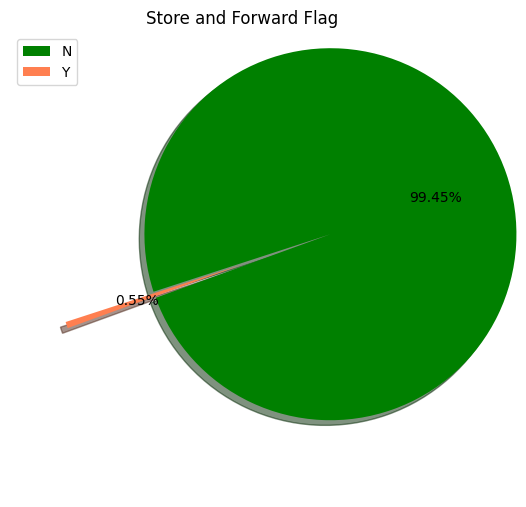

In [37]:
# Chart - 4 visualization code
plt.figure(figsize=(6,8))
plt.pie(nyc_data['store_and_fwd_flag'].value_counts(),colors=['green','coral'],shadow=True,explode=[0.5,0],autopct='%1.2f%%',startangle=200)
plt.legend(labels=['N','Y'])
plt.title('Store and Forward Flag')

##### 1. Why did you pick the specific chart?

store and forword flag is categorical value, which can be beautifully visualize and analized by pie plot.

##### 2. What is/are the insight(s) found from the chart?

We can see that less than 1% of trip that were store and forword.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of data is not store and forword trips that may cause negative impect as that trip records not allocating the vehicle server.

#### Chart - 5

###**Analysis of Trip Duration**

In [38]:
# 10 largest value of trip duration
print(nyc_data['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

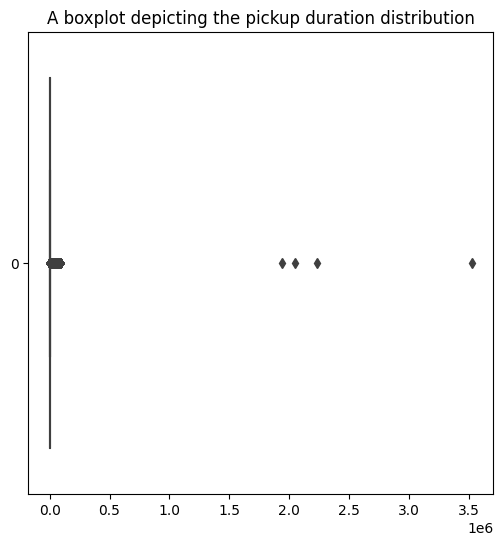

In [39]:
# Chart - 5 visualization code
plt.figure(figsize=(6,6))
sns.boxplot(nyc_data['trip_duration'],orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

##### 1. Why did you pick the specific chart?

Boxplot uses boxes and lines to depict the distribution of groups in numerical data and otherthan it gives good visualization of outlier.

##### 2. What is/are the insight(s) found from the chart?

Thus we see there is least number values are in between 2000000-3500000 while all others are somewhere between 0 and 100000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analysis says that near 2000000 to 3500000 is definitely an outlier which may impact the bussiness aspect so, we have to treat it.

#### Chart - 6

###**Visualization Of Pickup and Dropoff longitude**

In [40]:
nyc_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour', 'distance',
       'duration_time', 'pickup_timezone', 'dropoff_timezone'],
      dtype='object')

Text(0.5, 1.0, 'The Distribution Of Dropoff Latitude')

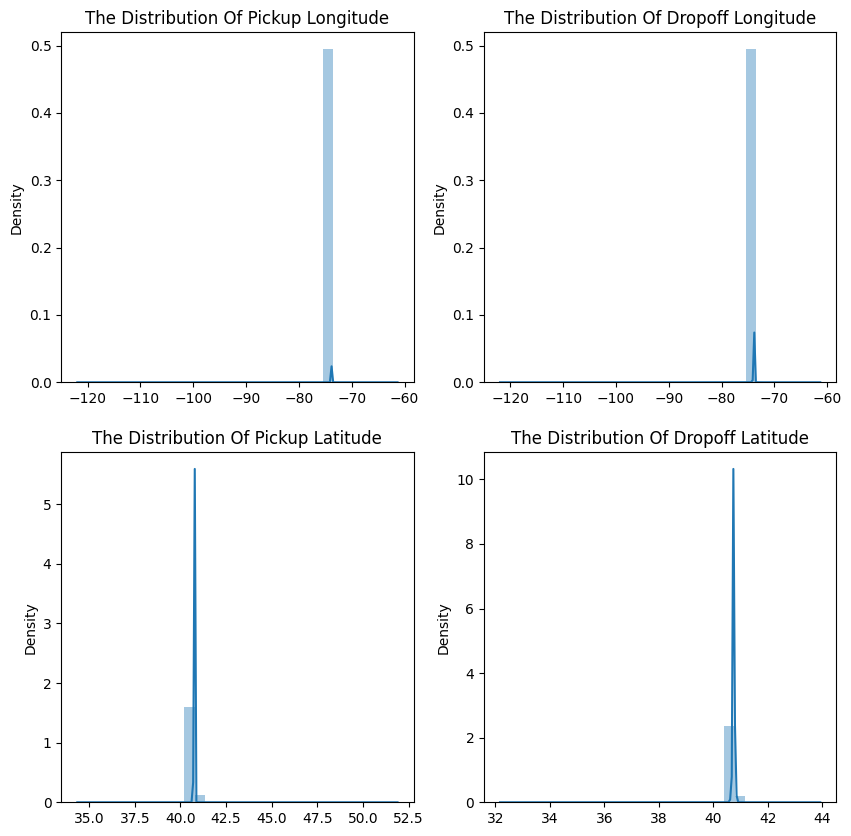

In [41]:
# Chart - 6 visualization code
figure,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))

sns.distplot(x=nyc_data['pickup_longitude'],ax=ax[0,0],kde=True,bins=30)
ax[0,0].set_title('The Distribution Of Pickup Longitude')

sns.distplot(x=nyc_data['dropoff_longitude'],ax=ax[0,1],kde=True,bins=30)
ax[0,1].set_title('The Distribution Of Dropoff Longitude')

sns.distplot(x=nyc_data['pickup_latitude'],ax=ax[1,0],kde=True,bins=30)
ax[1,0].set_title('The Distribution Of Pickup Latitude')

sns.distplot(x=nyc_data['dropoff_latitude'],ax=ax[1,1],kde=True,bins=30)
ax[1,1].set_title('The Distribution Of Dropoff Latitude')

##### 1. Why did you pick the specific chart?

All these columns are numericals so, distplot is a classical approach to visualize the distribution.

##### 2. What is/are the insight(s) found from the chart?

Charts shows that the pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup lattitude and the dropoff latitude has slightly different distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Latitude and logitude help to find the location where the taxi cap gets more and more trips, which leads to make profit without any further delay.

#### Chart - 7

###**Analysis Of Montly Trips**

In [42]:
nyc_data['pickup_month'].value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_month, dtype: int64

Text(0.5, 1.0, 'Overall Montly Trips')

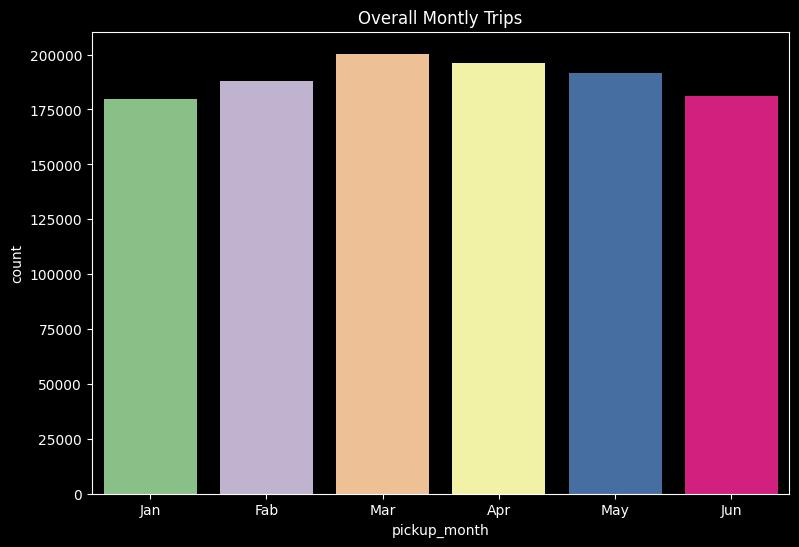

In [127]:
# Chart - 7 visualization code

plt.figure(figsize=(9,6))
sns.countplot(x='pickup_month',data=nyc_data,palette='Accent')
plt.xticks([0,1,2,3,4,5],labels=['Jan','Fab','Mar','Apr','May','Jun'])
plt.title('Overall Montly Trips')

##### 1. Why did you pick the specific chart?

Count plot displays the count of categorical observation in each bin of dataset that provides proper and understable visuazations.

##### 2. What is/are the insight(s) found from the chart?

Data available between january to june month only and in march maximun
trips are done , although all the six have good amount trip booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Only six month data is available we cannot justify remaining month data that how the trips gets fluctuate. Although from january to june has good amount bookings.

#### Chart - 8

###**Visualization Of Pickup - Dropoff Hour & Distribution of the Timezones**

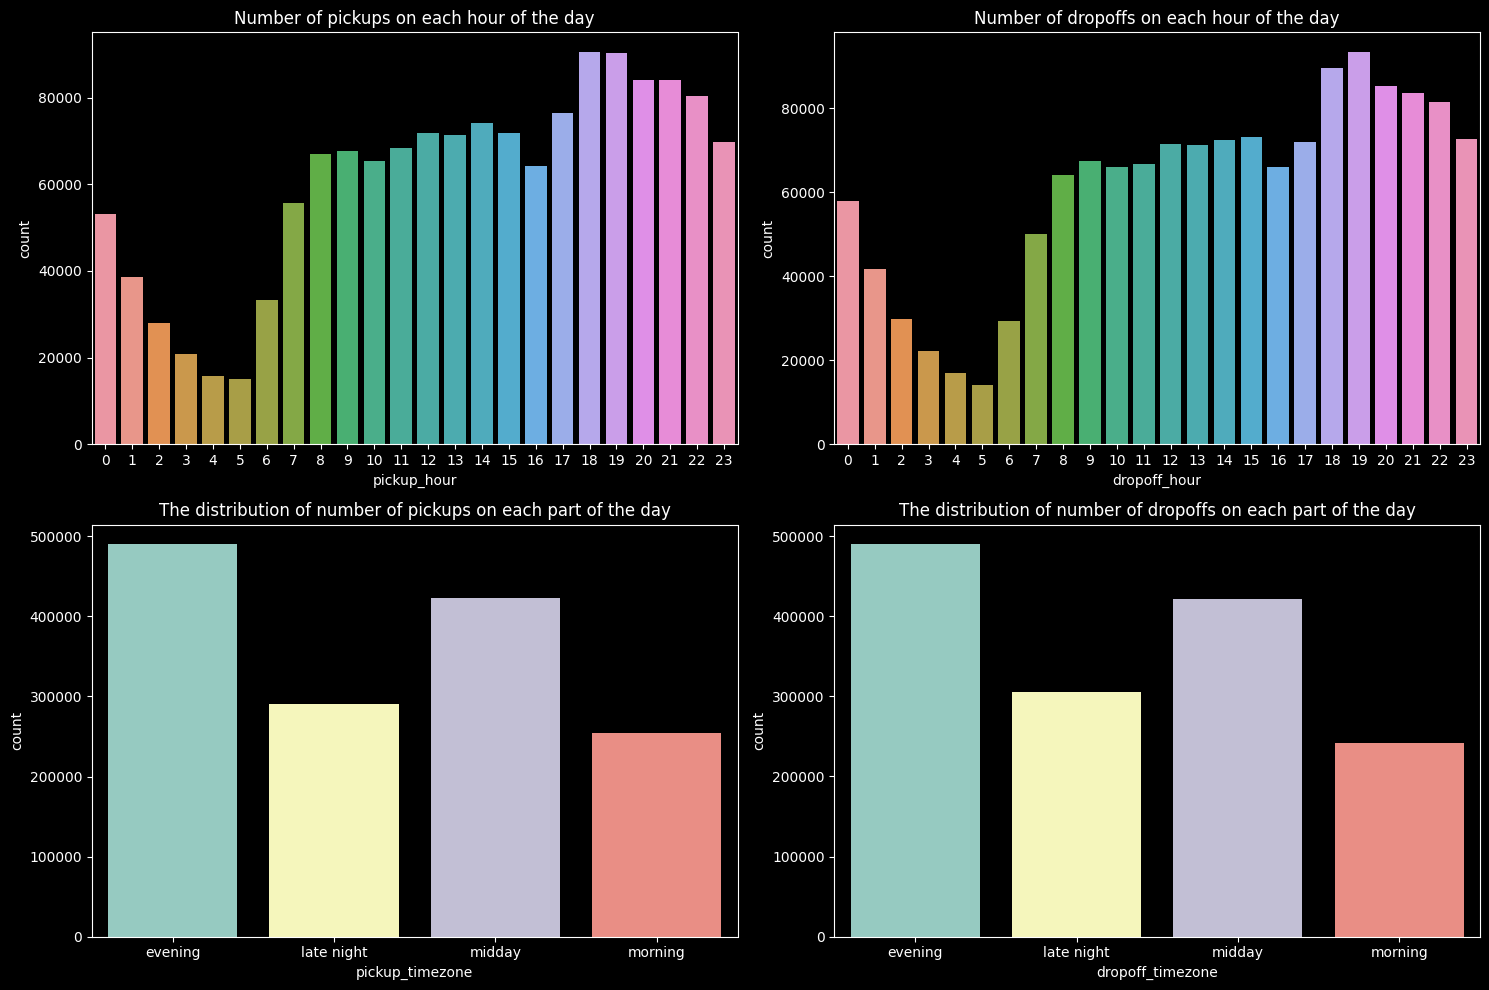

In [44]:
# Chart - 8 visualization code

figure,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='pickup_hour',data=nyc_data,ax=ax[0,0])
ax[0,0].set_title('Number of pickups on each hour of the day')

sns.countplot(x='dropoff_hour',data=nyc_data,ax=ax[0,1])
ax[0,1].set_title('Number of dropoffs on each hour of the day')


sns.countplot(x='pickup_timezone',data=nyc_data,ax=ax[1,0])
ax[1,0].set_title('The distribution of number of pickups on each part of the day')

sns.countplot(x='dropoff_timezone',data=nyc_data,ax=ax[1,1])
ax[1,1].set_title('The distribution of number of dropoffs on each part of the day')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

This is used to represent the occurance(count) of the observation and it gives visualization like bar and histogram so we can easily make group or cluster using it.

##### 2. What is/are the insight(s) found from the chart?

*  Both pickup_hour and dropoff_hour follows the same path and busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.      

*  Thus we observe that most pickups and drops occurs in the evening.While the least drops and pickups occurs durng morning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

At evening travelling rush is more so, it may take some time to visit destination but for less distance with more money due to rush.

#**4.2 Bivariate And Multivariate Analysis**

#### Chart - 9

###**Analysis Between Independent(x-variables)   Vs   Dependent(y-variable)**

In [45]:
#Creating numeric column separate
numeric_features=nyc_data.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'distance'],
      dtype='object')

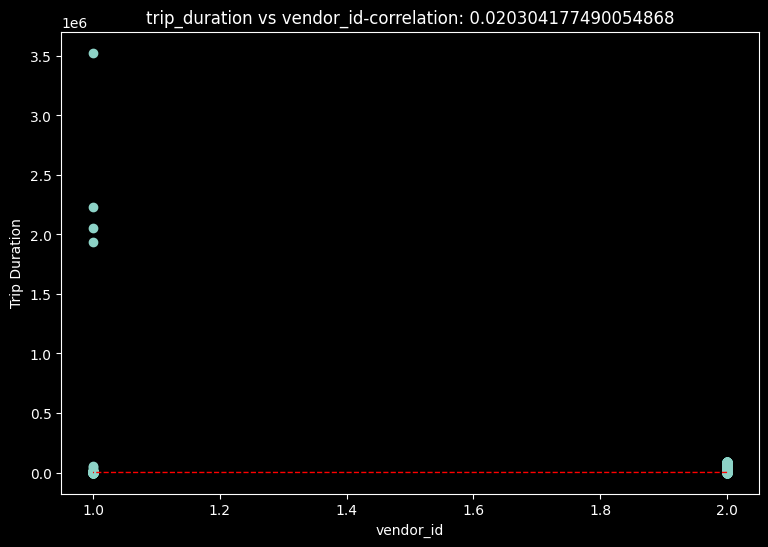

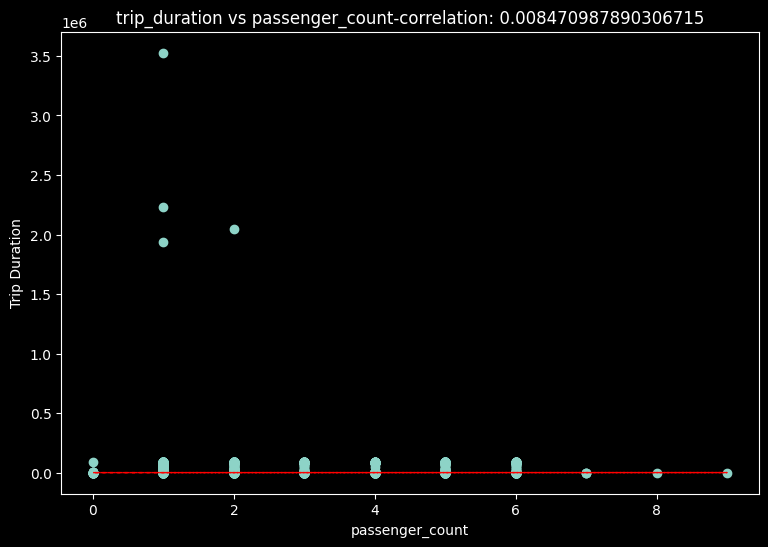

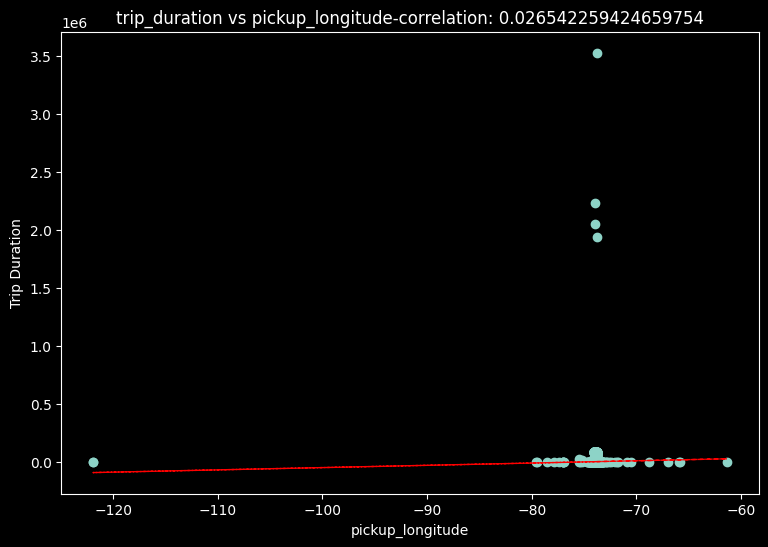

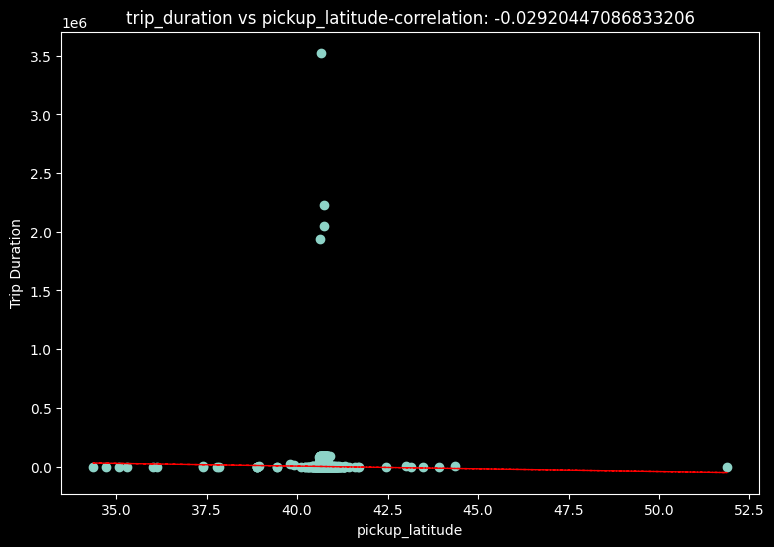

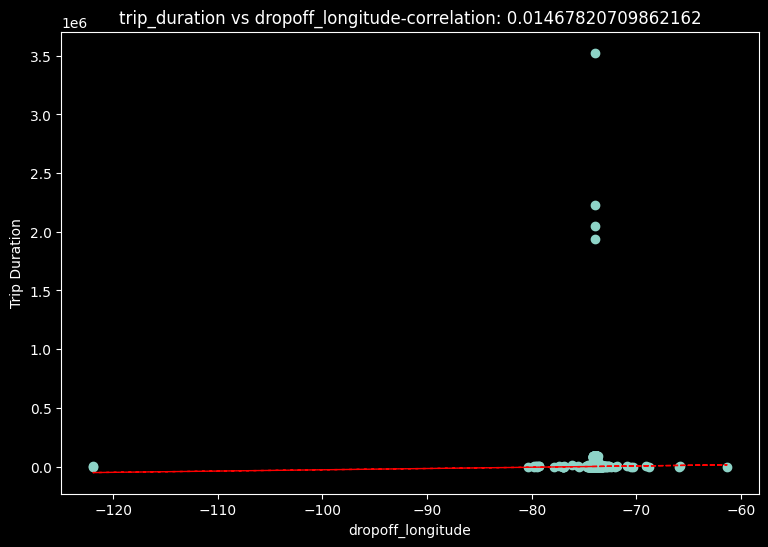

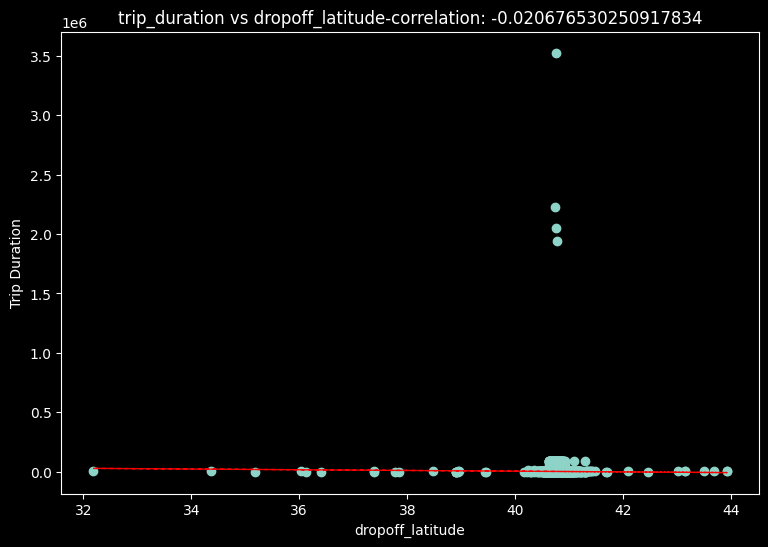

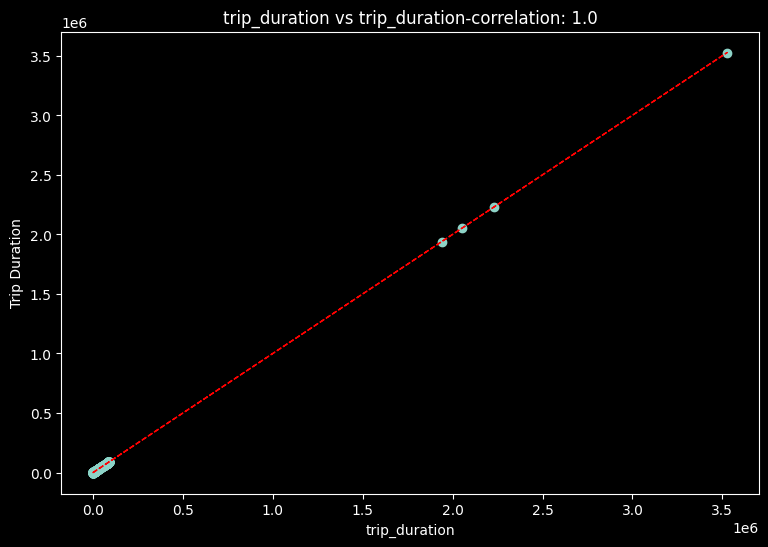

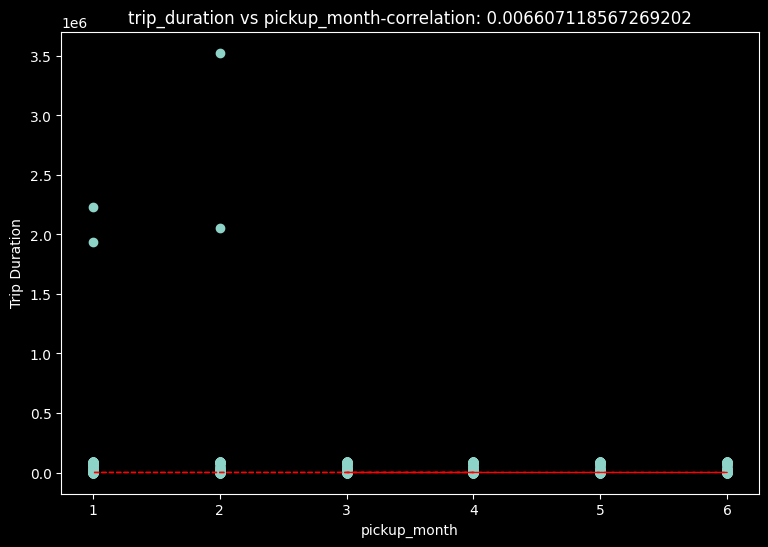

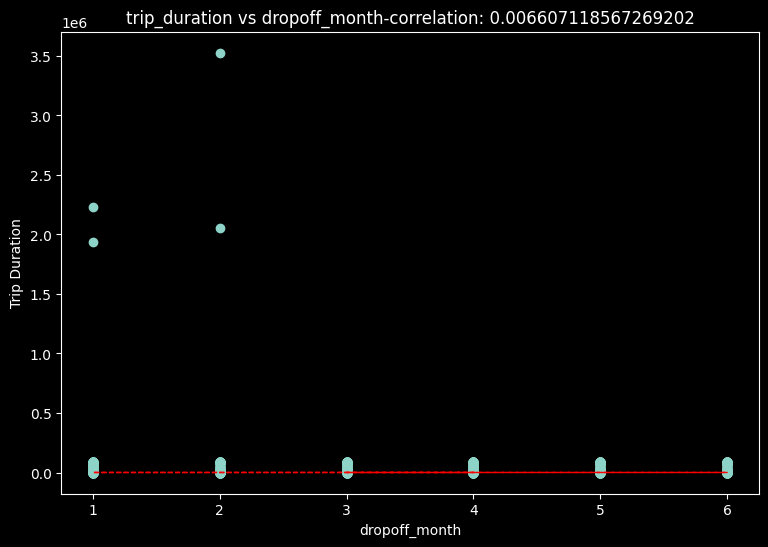

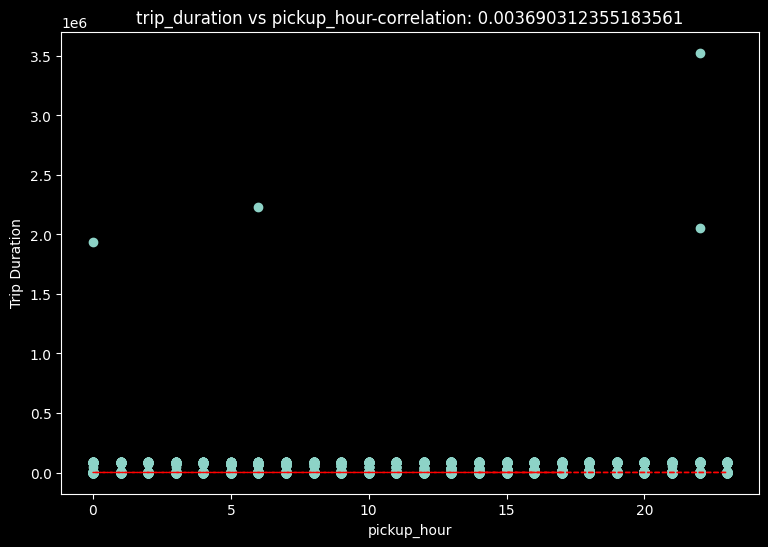

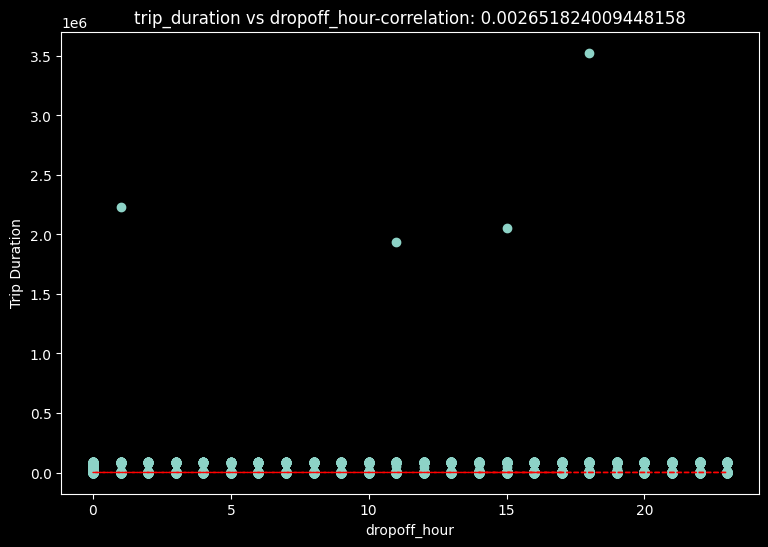

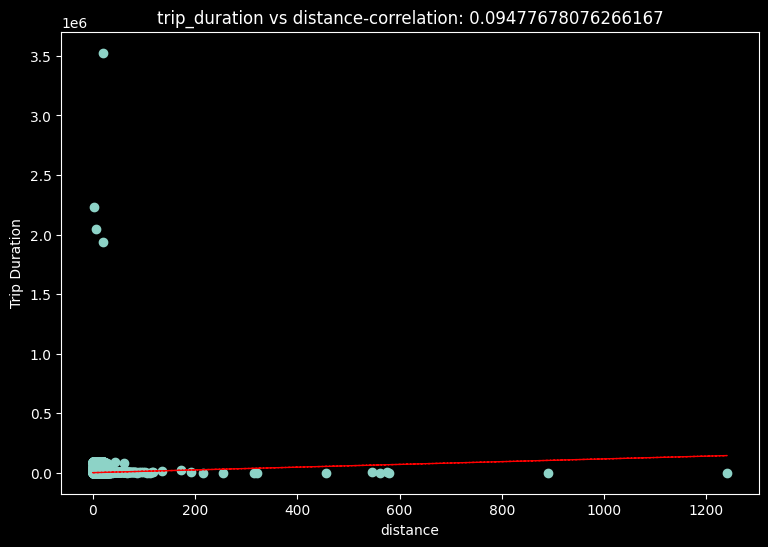

In [46]:
# Chart - 9 visualization code
for col in numeric_features:
  '''
  checking correlation between x and y variable
  '''
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=nyc_data[col]
  label=nyc_data['trip_duration']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Trip Duration')
  ax.set_title('trip_duration vs '+col+'-correlation: '+str(correlation))
  z=np.polyfit(nyc_data[col],nyc_data['trip_duration'],1)
  y_hat=np.poly1d(z)(nyc_data[col])

  plt.plot(nyc_data[col],y_hat,'r--',lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

Using polyfit which find the coeffients of a polynimial of degree plotting scatter plot between two variables (x and y) along two axes. Scatter plot briefly represents data in a graphical form.

##### 2. What is/are the insight(s) found from the chart?

As per the analysis two variable does not contains any linear relationalship or not normally distribution across x and y axis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Variables to y variable are not highly corelated to other. While model building these feature helps a lot without dropping.

#### Chart - 10

###**Analysis Of Passenger Count And Vendor Id**


In [47]:
#Finding the values of passenger count with respect to vendor id
values=nyc_data.groupby(by='vendor_id')['passenger_count'].sum()
values

vendor_id
1     854305
2    1573651
Name: passenger_count, dtype: int64

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

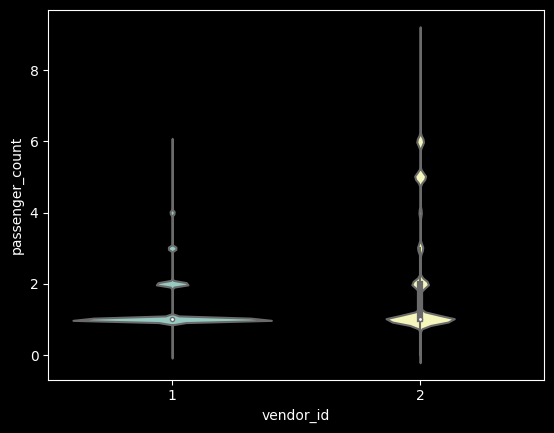

In [48]:
# Chart - 10 visualization code
sns.violinplot(y=nyc_data['passenger_count'],x=nyc_data['vendor_id'])

##### 1. Why did you pick the specific chart?

Passenger count is the numerical column we can easily understand the spread of the data from violin plot.

##### 2. What is/are the insight(s) found from the chart?

From the analysis we can see that vendor_id(2) has more number of passenger upto (<=6) and vendor_id(1) carries less number passenger upto (<=4). In both maximum number of trips are in between (1 to 3) passenger.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the taxi driver looking for the more number passenger, so the focus will be at vendor_id(2) can provide more trip duration as well as more money.

#### Chart - 11

### **Visualization Of Distance**

Text(0.5, 1.0, 'A compared distributionof trips >5 hours')

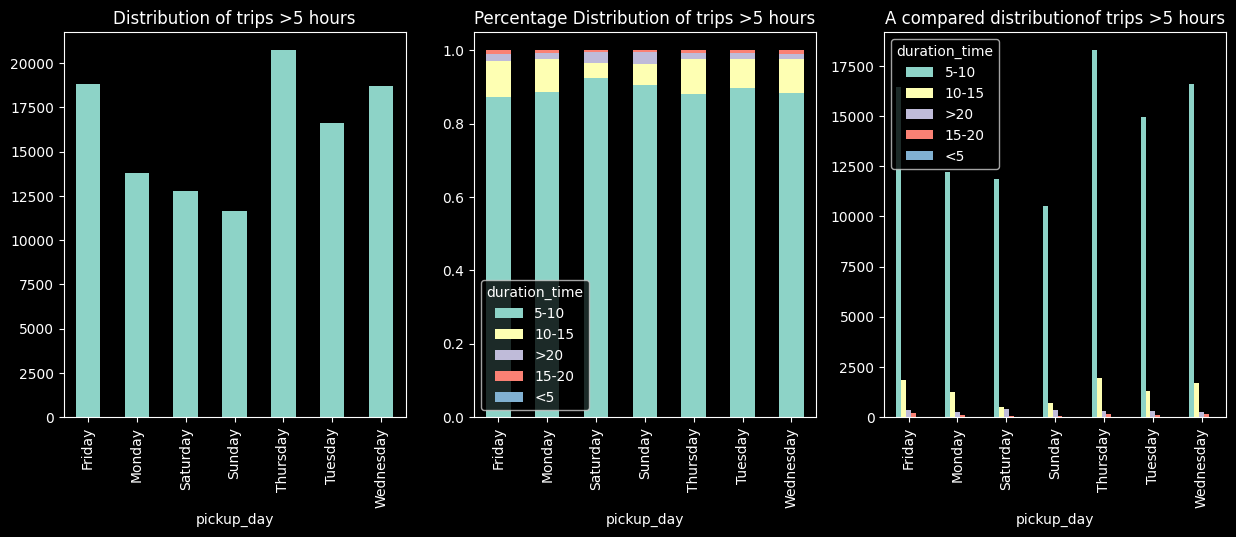

In [49]:
# Chart - 11 visualization code
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))

ax1=nyc_data[(nyc_data.duration_time != "<5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips >5 hours')

ax2=nyc_data[(nyc_data.duration_time != "<5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar',stacked='True',ax=ax[1])
ax[1].set_title("Percentage Distribution of trips >5 hours")

ax3=nyc_data[(nyc_data.duration_time != "<5")].groupby('pickup_day')['duration_time'].value_counts(normalize=False).unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distributionof trips >5 hours')

##### 1. Why did you pick the specific chart?

Bar plots are driven beautifully for categorical as well as numericals values as shown in chart representation.  

**Chart Descriptions ▶**   
    
* The left most graph shows a frequency distribution of the number of trips (>5 hours) taken on each day of the week.    

* The middle one shows a percentage distribution of the trips of different duration (>5 hours) within each day of the week.  
    
* The right one shows the frequency distribution of the trips of different duration (>5 hours) within each day of the week


##### 2. What is/are the insight(s) found from the chart?

* The most number trips which lasts >5 hours were taken on Thursday followed by Friday and Wednesday.(Left graph)         

* The most number of trips of duration 5-10,10-15 was taken on Thursday.(Right graph)        

* But the highest percentage of trips longer than 20 hours was taken on Sunday and Saturday.(Middle graph)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above analysis we can understand most of the trips with higher duration is on weekands that can give positive impact as per bussiness aspects.

#### Chart - 12

###**Analysis Of Distance**

####**◀ Distance per passenger count ▶**

Text(0.5, 1.0, 'Distance Vs Passenger count')

<Figure size 600x800 with 0 Axes>

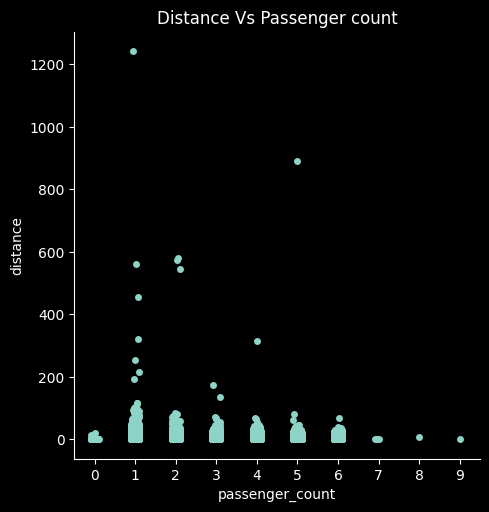

In [50]:
# Chart - 12 visualization code
plt.figure(figsize=(6,8))
sns.catplot(y='distance',x='passenger_count',data=nyc_data,kind='strip')
#sns.swarmplot(y=nyc_data['distance'],x=nyc_data['passenger_count'])
plt.title('Distance Vs Passenger count')

####**◀ Distance per hour of day ▶**

Text(0.5, 1.0, 'Distance Vs Pickup hour')

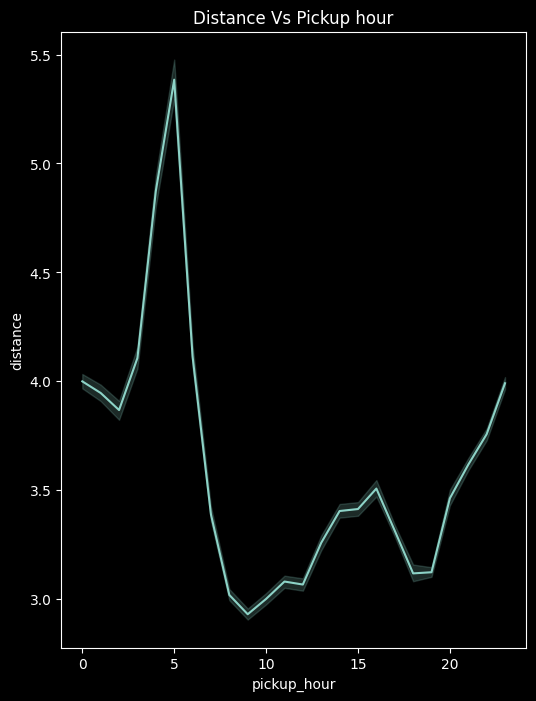

In [51]:
plt.figure(figsize=(6,8))
sns.lineplot(x='pickup_hour',y='distance',data=nyc_data)
plt.title('Distance Vs Pickup hour')

####**◀ Distance Per Month ▶**

Text(0.5, 1.0, 'Distance Vs Pickup month')

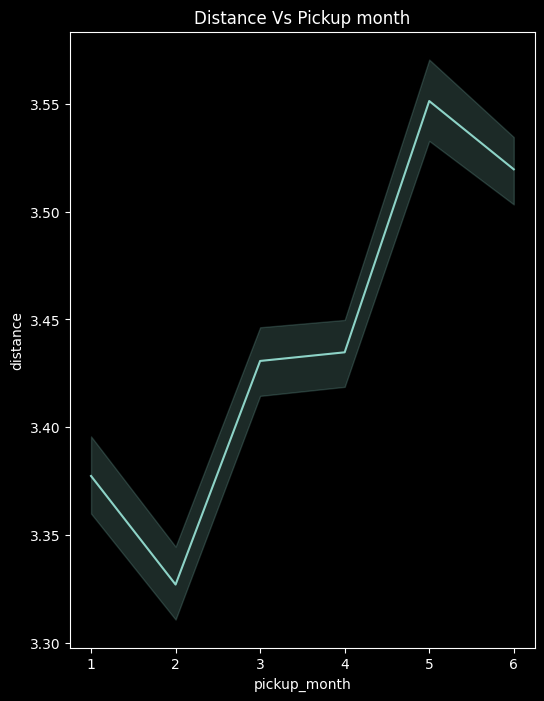

In [52]:
plt.figure(figsize=(6,8))
sns.lineplot(x='pickup_month',y='distance',data=nyc_data)
plt.title("Distance Vs Pickup month")

####**◀ Trip Duration and Distance ▶**

Text(0.5, 1.0, 'Distance Vs Trip duration')

<Figure size 600x800 with 0 Axes>

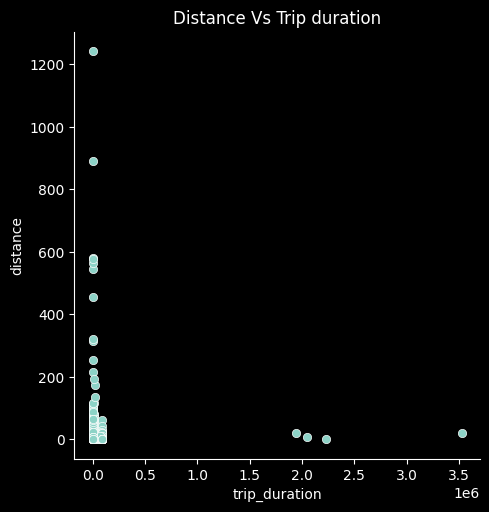

In [53]:
plt.figure(figsize=(6,8))
sns.relplot(y=nyc_data.distance,x='trip_duration',data=nyc_data)
plt.title('Distance Vs Trip duration')

##### 1. Why did you pick the specific chart?

Catplot is used to plot categorical and numerical variable whereas line plot visualize information as a series of data points called makers connected by straight line segments. And relplots refers to relationship plot, replot takes some of the same argument as scatterplot.             
Graphs visually illustrate ralationship between them.

##### 2. What is/are the insight(s) found from the chart?

 **Graph-1**     

* Longer distance covered by 1 or 2 or 5 passenger rides.     

**Graph-2**        
     
* Trip distance is highest during early morning hours.                 
* It is fairly equal from morning till the eveing varying around 3-3.5 kms.        
* It start increasing gradually towards the late night hours starting from evening till 5 AM and decrease speedly towords morning.        

**Graph-3**           
* As per trip distance per month, trip distance is the lowest in February and the maximum in may

**Graph-4**           
* There are trips which trip duration as short as 0 seconds and yet covering a large distance. Hence Outlier treatment should be done on it for higher and lower value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* As we see that if the cap driver looking longer distance trip, so the passenger count more that 2.         

* Those who want to go outside for any work or personal reason, they mainly looks trip to travel morning and evening to manage time according to there work.          

* Fabuary is the valentine month even that also they are getting very less trips.             

* Distance column contains outlier in it. Which may impact in model building so we have to drop them.

#### Chart - 13

###**Relationaship Between Geographical location and Duration**

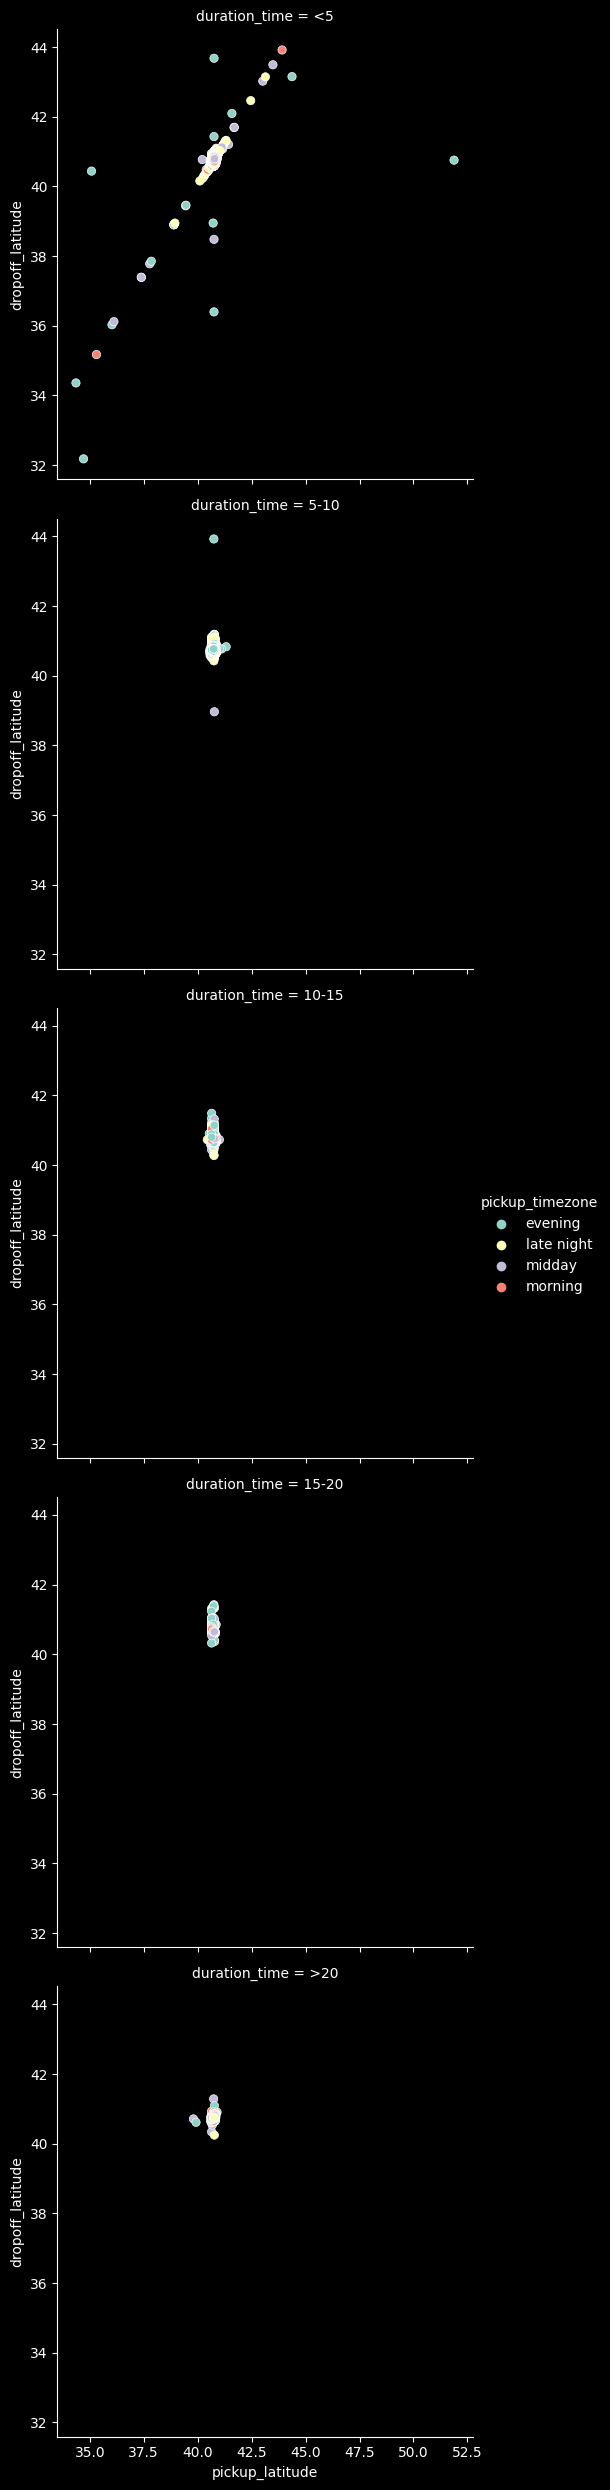

In [54]:
# Chart - 13 visualization code
sns.relplot(x='pickup_latitude',y='dropoff_latitude',hue='pickup_timezone',row='duration_time',data=nyc_data)

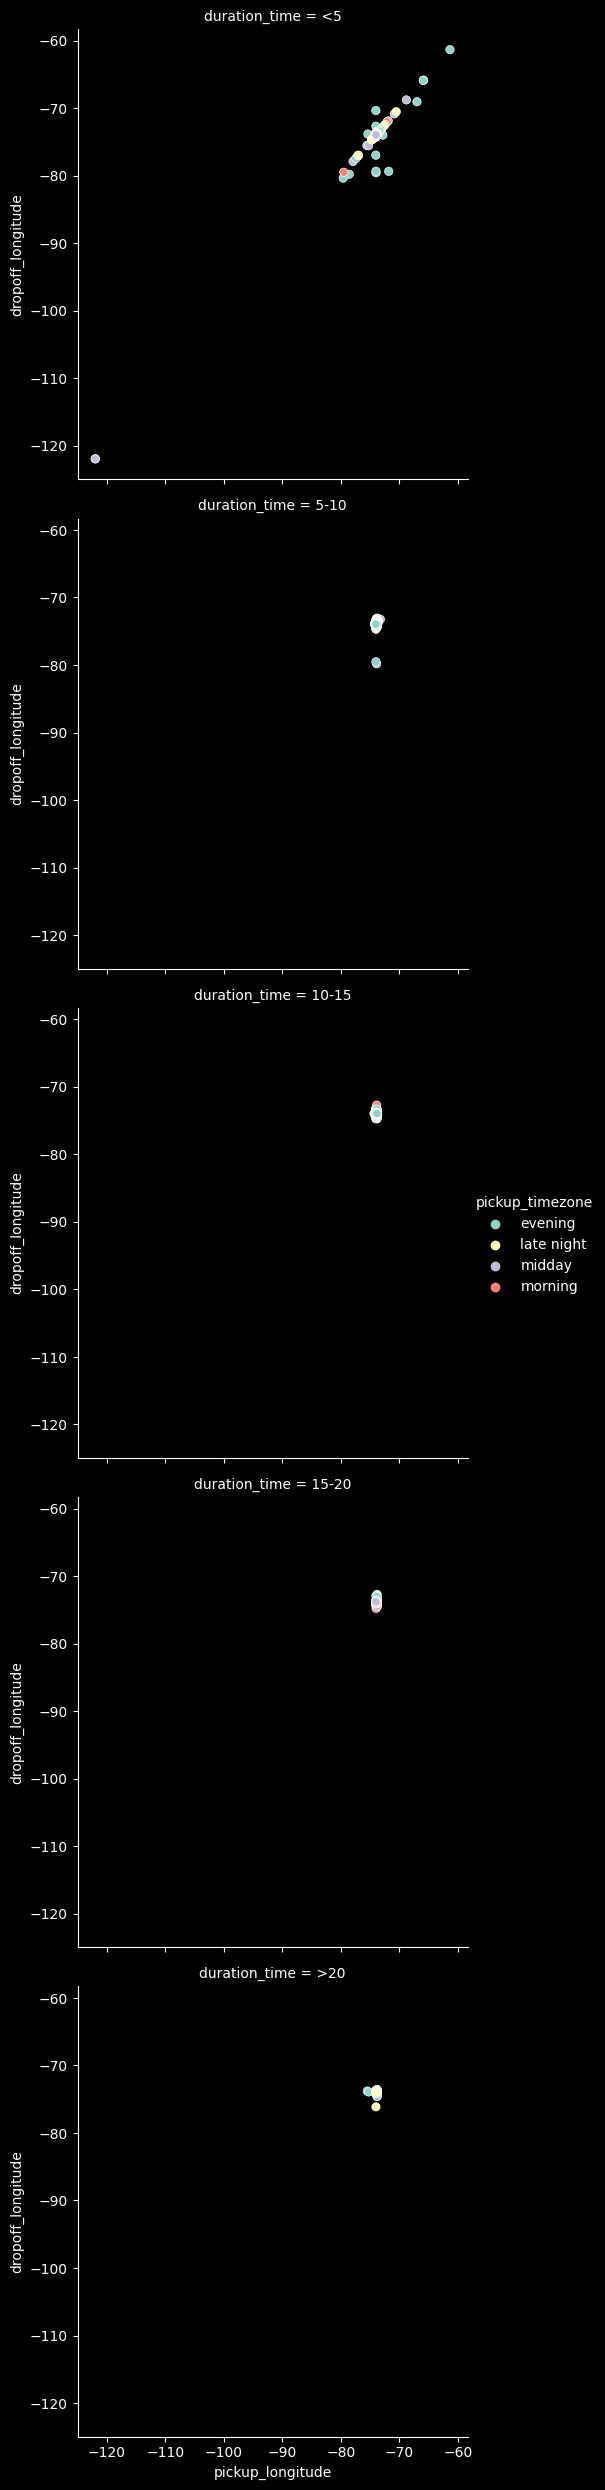

In [55]:
#Visualization of longitude w.r.t timezone and duration time
sns.relplot(x='pickup_longitude',y='dropoff_longitude',hue='pickup_timezone',row='duration_time',data=nyc_data)

##### 1. Why did you pick the specific chart?

To make complex comparisons easier, Seaborn provides a function called relplot, which is short for relationship plot. Relplot provides beautifull representation of multiple features that can visualize above.

##### 2. What is/are the insight(s) found from the chart?

**Graph-1**

* For shorter trips(<5), the pickup and dropoff latitude is more or less evenly distributed between 30 to 40 degrees.    

* For longer trips(>5), the pickup and dropoff latitude is all concentrated between 40 to 42 degrees.

**Graph-2**

* For shorter trips(>5), the pickup and dropoff longitude is more or less evenly distributed between -80 to -65 degrees with two outlier near -120 degree.

* For longer trips(>5) the pickup and dropoff longitude is all concentrated near -75 degree.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Latitude and longitude shows distance between consecutive points through map and by knowing them we can say that higher time duration trips between this longitude and that latitude.

#### Chart - 14 - Correlation Heatmap

In [56]:
nyc_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour', 'distance',
       'duration_time', 'pickup_timezone', 'dropoff_timezone'],
      dtype='object')

In [57]:
pd.set_option('display.max_columns',None)
nyc_data.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,duration_time,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17,1.498523,<5,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,1.805510,<5,late night,late night


<Axes: >

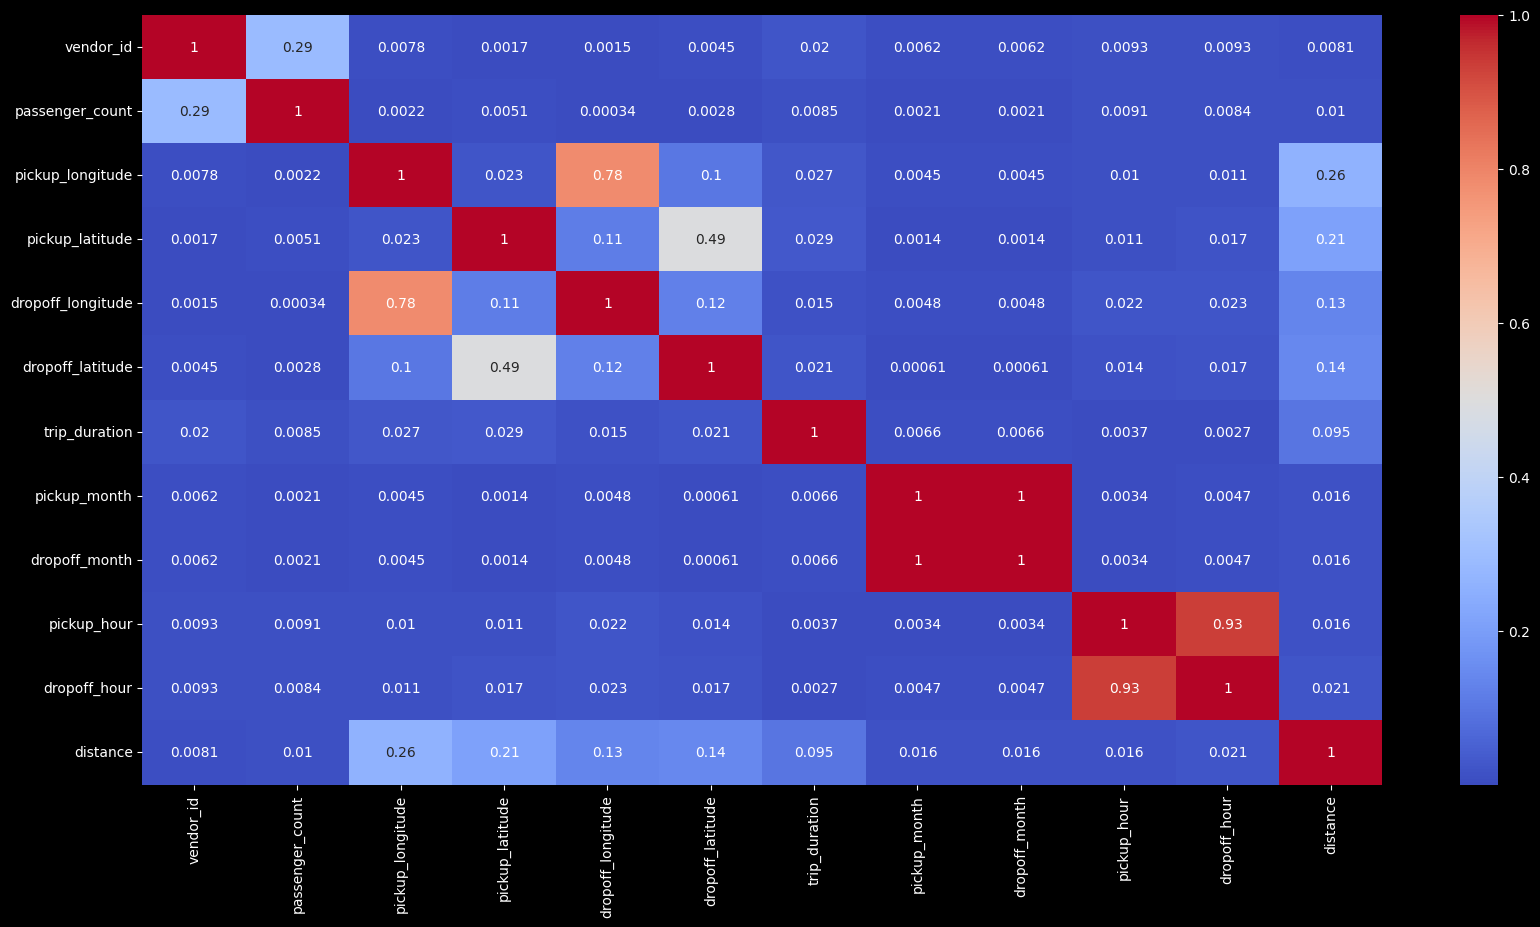

In [58]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
coorelation=nyc_data.corr()
sns.heatmap(abs(coorelation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A coorelation heatmap is a graphical tool that displays the coorelation between multiple variables as a color-coded matrix. Its like a color chart that shows us how closely related different variables to each other with their percentage of distribution.

##### 2. What is/are the insight(s) found from the chart?

From the analysis qwe can see that some of features are highly coorelated with each other:-

* pickup_month and dropoff_month are 100% coorelated.

* pickup_hour and dropoff_hour are 93% coorelated.

* pickup_longitude and dropoff longitude longitude are also highly coorelated approx 78%.

* Other are coorelation are less that helps in making good model.

#### Chart - 15 - Pair Plot

In [59]:
#Creating Numerical columns from the dataset
Numerical_features=nyc_data[['vendor_id','passenger_count','trip_duration','pickup_month','pickup_hour']]
Numerical_features


,vendor_id,passenger_count,trip_duration,pickup_month,pickup_hour
0,2,1,455,3,17
1,1,1,663,6,0
2,2,1,2124,1,11
3,2,1,429,4,19
4,2,1,435,3,13
...,...,...,...,...,...
1458639,2,4,778,4,13
1458640,1,1,655,1,7
1458641,2,1,764,4,6
1458642,1,1,373,1,15


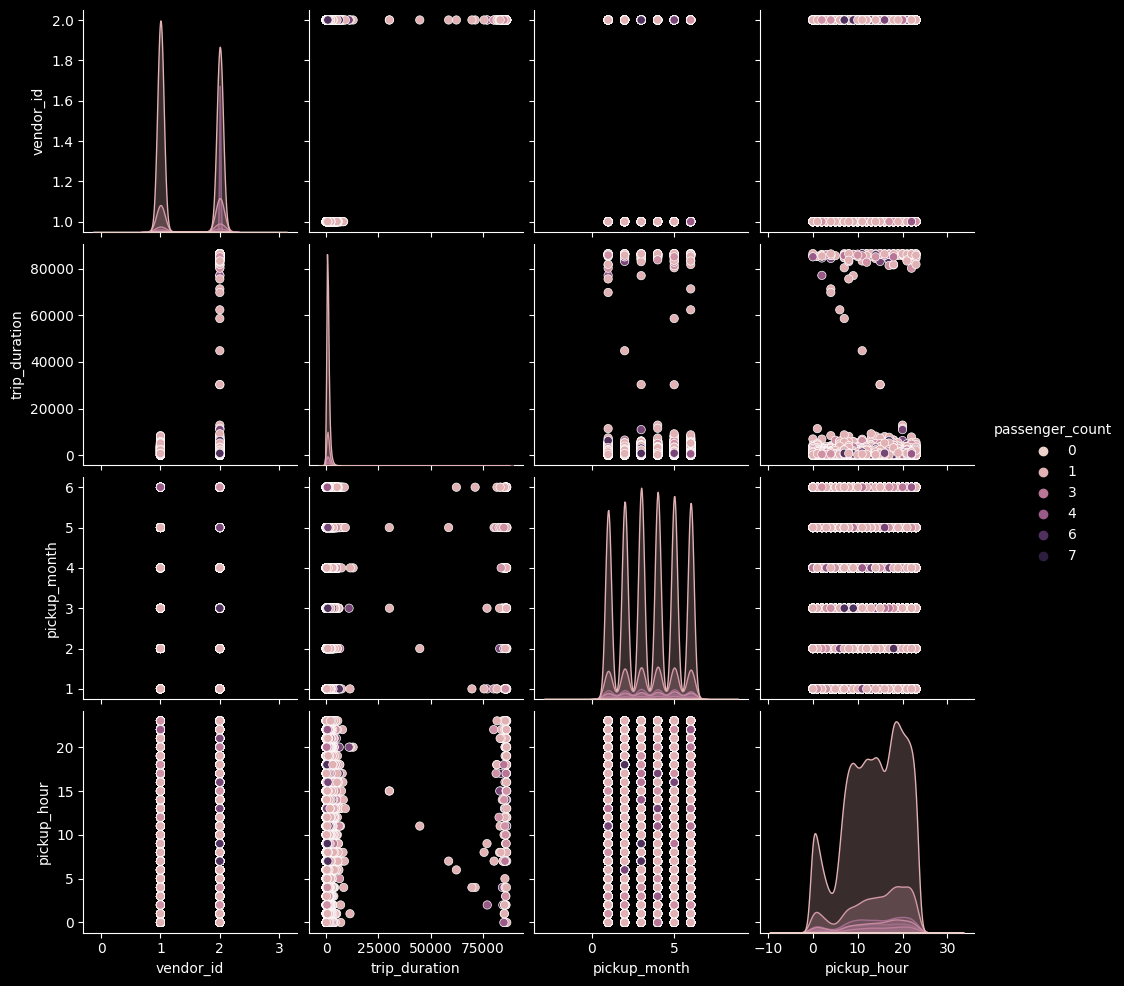

In [60]:
# Pair Plot visualization code
sns.pairplot(Numerical_features.sample(100000),hue='passenger_count')

##### 1. Why did you pick the specific chart?

Pairplot visualize given data to find the relationship between them where the variables can be continuous or categorical. Plot pairwise relationship in a dataset. Pairplot is a module of seaborn library which provides a high-level interface for drawing attractive and information statistical graphics.

##### 2. What is/are the insight(s) found from the chart?

Pairplot is pair-wise visualization And from above visualization only taken 1 lakh data of numerical columns from approx 14 lakh NYC dataset. It takes very much time excecute also does not meet our RAM. It is only 10% data we cannot execute much and details collected from graph is only for 1lakh ramdom data.

* Mostly least number of passenger cap get more ride book in every month.

* VendorId-2 has more passenger count in taxi and also travel long distance as compared to others.

* With more passenger count taxi run in only 1,3,5 month.

* Trip duration and pickup month are equally distributed for 1lakh data.

* People like to travel alone at night or after 6PM.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [61]:
nyc_data.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,duration_time,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17,1.498523,<5,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,1.805510,<5,late night,late night


Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
nyc_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
dropoff_day           0
pickup_month          0
dropoff_month         0
pickup_hour           0
dropoff_hour          0
distance              0
duration_time         4
pickup_timezone       0
dropoff_timezone      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no null values are present in dataset so does not required any missing value imputation techniques.

### 2. Handling Outliers

###**Quartile Method**    

**Interquartile range measures the spread of the middle half of our data.**    

**Formula: Q3-Q1**

**where Q1-quartile1 and Q3-quartile3**

**lower limit of the data is given by Q1-1.5*IQR**

**upper limit of the data is given by Q3+1.5*IQR**

<Axes: >

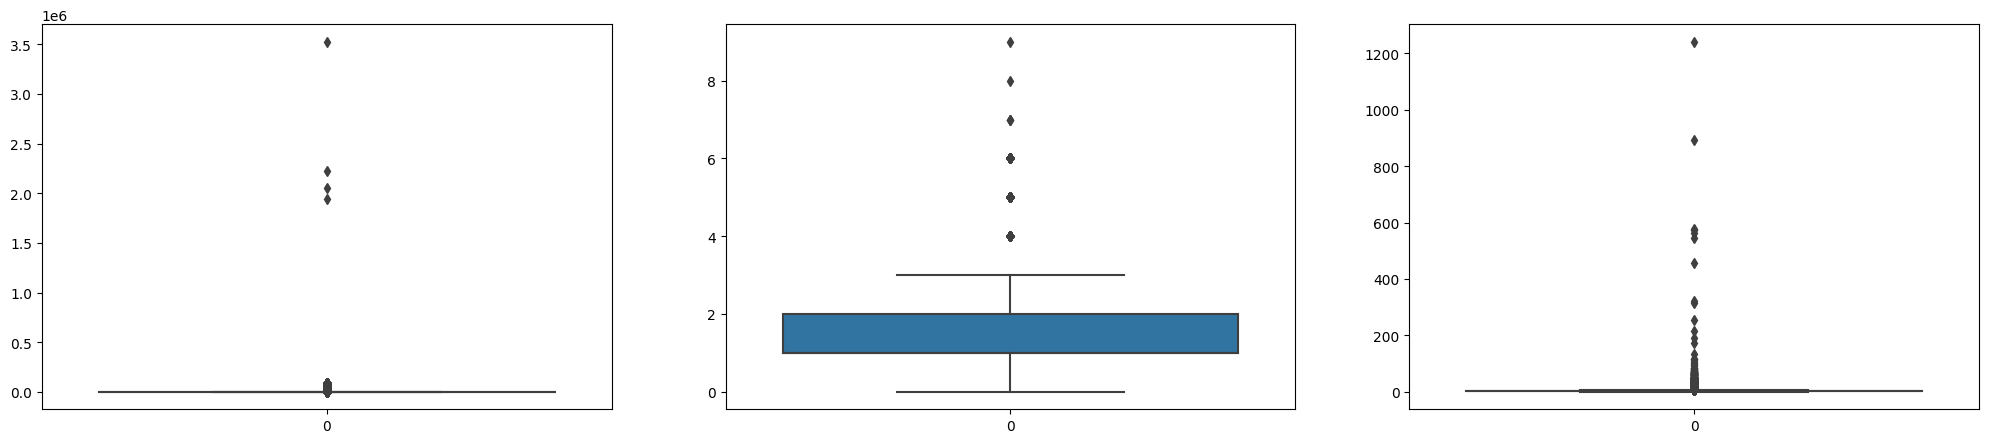

In [32]:
#boxplot for visualizing for outliers
fig,ax=plt.subplots(1,3,figsize=(25,5))
sns.boxplot(nyc_data['trip_duration'],ax=ax[0])
sns.boxplot(nyc_data['passenger_count'],ax=ax[1])
sns.boxplot(nyc_data['distance'],ax=ax[2])

In [33]:
# Handling Outliers & Outlier treatments
##Finding different quarters of trip_duration column
trip_duration_Q1=nyc_data['trip_duration'].quantile(0.25)
print(f'first quartile value that is 25th percentile of the trip duration: {trip_duration_Q1}')

trip_duration_Q2=nyc_data['trip_duration'].quantile(0.50)
print(f'second quartile value that is 50th percentile of the trip duration: {trip_duration_Q2}')

trip_duration_Q3=nyc_data['trip_duration'].quantile(0.75)
print(f'third quartile value that is 75th percentile of the trip duration: {trip_duration_Q3}')

first quartile value that is 25th percentile of the trip duration: 397.0
second quartile value that is 50th percentile of the trip duration: 662.0
third quartile value that is 75th percentile of the trip duration: 1075.0


In [34]:
#Calculating interquartile range
IQR=trip_duration_Q3-trip_duration_Q1
print('IQR:',IQR)
trip_duration_lower_limit=trip_duration_Q1-1.5*IQR
trip_duration_upper_limit=trip_duration_Q3+1.5*IQR
print(f'lower limit of trip duration: {trip_duration_lower_limit}')
print(f'upper limit of trip duration: {trip_duration_upper_limit}')

IQR: 678.0
lower limit of trip duration: -620.0
upper limit of trip duration: 2092.0


In [35]:
#Removing outliers in trip_duration column
nyc_data=nyc_data[nyc_data['trip_duration']>0]
nyc_data=nyc_data[nyc_data['trip_duration']<trip_duration_upper_limit]

In [36]:
#Checking shape of dataset
nyc_data.shape

(1384320, 21)

In [37]:
#Fing different quarters of passenger count column
passenger_count_Q1=nyc_data['passenger_count'].quantile(0.25)
print(f'first quartile value that is 25th percentile of passenger count: {passenger_count_Q1}')

passenger_count_Q2=nyc_data['passenger_count'].quantile(0.50)
print(f'second quartile value that is 50th percentile of passenger count: {passenger_count_Q2}')

passenger_count_Q3=nyc_data['passenger_count'].quantile(0.75)
print(f'third quartile value that is 75th percentile of passenger count: {passenger_count_Q3}')

first quartile value that is 25th percentile of passenger count: 1.0
second quartile value that is 50th percentile of passenger count: 1.0
third quartile value that is 75th percentile of passenger count: 2.0


In [38]:
#Calculation IQR
IQR=passenger_count_Q3-passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1-1.5*IQR
passenger_count_upper_limit=passenger_count_Q3+1.5*IQR
print(f'lower limit of passenger count: {passenger_count_lower_limit}')
print(f'upper limit of passenger count: {passenger_count_upper_limit}')

lower limit of passenger count: -0.5
upper limit of passenger count: 3.5


In [39]:
#Removing Outliers
nyc_data=nyc_data[nyc_data['passenger_count']>0]
nyc_data=nyc_data[nyc_data['passenger_count']<passenger_count_upper_limit]

In [40]:
#Checking shape of dataset
nyc_data.shape

(1237987, 21)

In [41]:
#Finding different quarters of distance column
distance_Q1=nyc_data['distance'].quantile(0.25)
print(f'first quartile value that is 25th percentile of distance: {distance_Q1}')

distance_Q2=nyc_data['distance'].quantile(0.50)
print(f'second quartile value that 75th percentile of distance: {distance_Q2}')

distance_Q3=nyc_data['distance'].quantile(0.75)
print(f'third quartile value that 75th percntile of distance: {distance_Q3}')

first quartile value that is 25th percentile of distance: 1.197497120120381
second quartile value that 75th percentile of distance: 1.9919619004442215
third quartile value that 75th percntile of distance: 3.4835674136716936


In [42]:
#Calculating IQR
IQR=distance_Q3-distance_Q1
distance_lower_limit=distance_Q1-1.5*IQR
distance_upper_limit=distance_Q3+1.5*IQR
print(f'lower limit of distance: {distance_lower_limit}')
print(f'upper limit of distance: {distance_upper_limit}')

lower limit of distance: -2.231608320206588
upper limit of distance: 6.912672853998663


In [43]:
#Removing Outlier
nyc_data=nyc_data[nyc_data['distance']>0]
nyc_data=nyc_data[nyc_data['distance']<distance_upper_limit]

In [44]:
#Checking shape of dataset
nyc_data.shape

(1136749, 21)

<Axes: xlabel='trip_duration', ylabel='Density'>

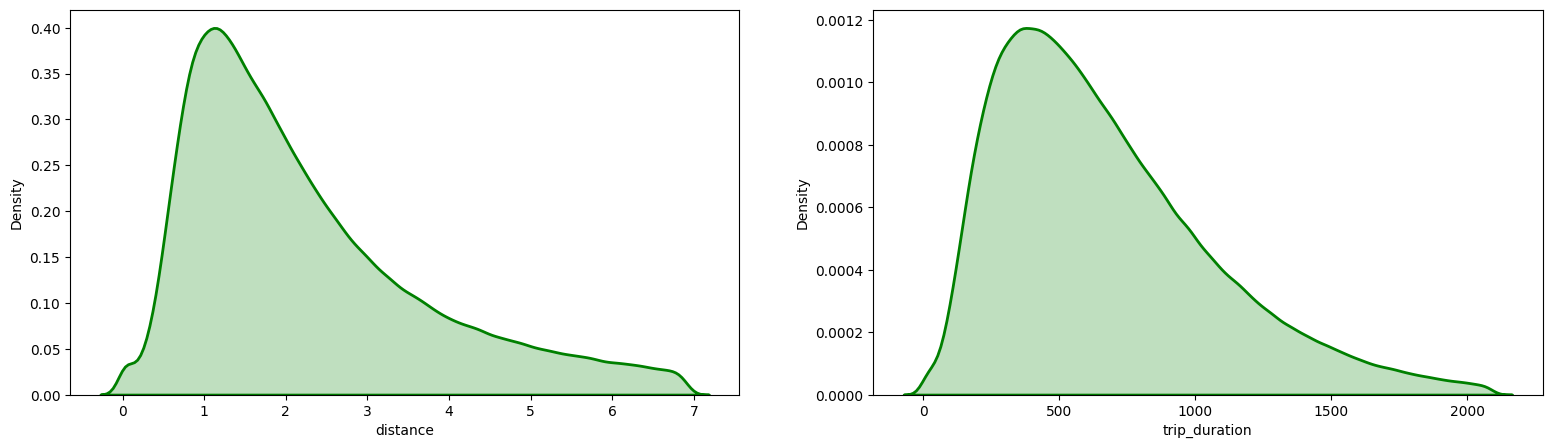

In [45]:
#From the above EDA we can see that distance and trip_duration column is highly skewed and distribution after outlier treatment
figure,ax=plt.subplots(1,2,figsize=(19,5))
sns.distplot(nyc_data['distance'],hist=False,kde=True,kde_kws={'shade':True, 'linewidth':2},color='green',ax=ax[0])
sns.distplot(nyc_data['trip_duration'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':2},color='green',ax=ax[1])

In [46]:
#From chart-13 we can see that pickup and dropoff longitude contains outlier in it, value which less than -100 in it.
nyc_data[nyc_data['pickup_longitude']<-100]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,duration_time,pickup_timezone,dropoff_timezone
1068810,id3777240,2,2016-01-27 18:26:40,2016-01-27 18:45:05,2,-121.933235,37.389297,-121.933205,37.389103,N,1105,Wednesday,Wednesday,1,1,18,18,0.021800,<5,evening,evening
1184454,id2854272,2,2016-02-26 13:50:19,2016-02-26 13:58:38,2,-121.933342,37.389381,-121.933304,37.389511,N,499,Friday,Friday,2,2,13,13,0.014811,<5,midday,midday


In [47]:
#Dropping this two rows because all the value in longitude ranges between -90 to 90
nyc_data.drop([1068810,1184454],axis=0,inplace=True)
nyc_data.shape

(1136747, 21)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Quartile Method**   

An outlier is considered any value more than Q times the interquantile range from the lower and upper quatiles. You can adjust the value of Q and the size of the interquantile range. The probability for the lower quantile that is used to calculate the interquatile range. And hence any observation that are than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.        
And dropping method also helps to remove outlier with highest value.



### 3. Categorical Encoding

In [48]:
#Creating a new dataset which is copy of original dataset
nyc_data_copy=nyc_data.copy()

In [49]:
#Checking values of store and forward flag
nyc_data_copy['store_and_fwd_flag'].value_counts()

N    1130818
Y       5929
Name: store_and_fwd_flag, dtype: int64

In [50]:
# Encode your categorical columns
## Importing sklearn -> one hot encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
nyc_data_copy.store_and_fwd_flag=le.fit_transform(nyc_data_copy.store_and_fwd_flag)
nyc_data_copy.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,duration_time,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,Monday,Monday,3,3,17,17,1.498523,<5,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,Sunday,Sunday,6,6,0,0,1.805510,<5,late night,late night
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,Wednesday,Wednesday,4,4,19,19,1.485501,<5,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,Saturday,Saturday,3,3,13,13,1.188590,<5,midday,midday
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,Saturday,Saturday,5,5,7,8,5.714989,<5,morning,morning


In [51]:
#From the graphical representation and values in pickup - dropoff days And pickup-dropoff timezone are approx same
#or we can say that this categorical values are highly multi-correlated to each other
nyc_data_copy['days']=nyc_data_copy['pickup_day']
nyc_data_copy['timezones']=nyc_data_copy['pickup_timezone']

In [52]:
#Checking values of duration time
nyc_data_copy['duration_time'].value_counts()

<5       1121947
5-10       14800
10-15          0
15-20          0
>20            0
Name: duration_time, dtype: int64

In [53]:
#Checking values of days column
nyc_data_copy['days'].value_counts()

Saturday     174414
Friday       174372
Thursday     169768
Wednesday    164508
Tuesday      158966
Sunday       149078
Monday       145641
Name: days, dtype: int64

In [54]:
#Checking values timezones column
nyc_data_copy['timezones'].value_counts()

evening       388113
midday        331789
late night    218363
morning       198482
Name: timezones, dtype: int64

In [55]:
#Creating dummies of duration time , days and timezones columns
nyc_data_copy=pd.get_dummies(nyc_data_copy,columns=['duration_time','days','timezones'], prefix=['duration','day','zone'])

In [56]:
nyc_data_copy=pd.get_dummies(nyc_data_copy,columns=['pickup_month'],prefix=['month'])

In [57]:
#Checking dataset
nyc_data_copy.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,dropoff_month,pickup_hour,dropoff_hour,distance,pickup_timezone,dropoff_timezone,duration_<5,duration_5-10,duration_10-15,duration_15-20,duration_>20,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,zone_evening,zone_late night,zone_midday,zone_morning,month_1,month_2,month_3,month_4,month_5,month_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,Monday,Monday,3,17,17,1.498523,evening,evening,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,Sunday,Sunday,6,0,0,1.805510,late night,late night,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,Wednesday,Wednesday,4,19,19,1.485501,evening,evening,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,Saturday,Saturday,3,13,13,1.188590,midday,midday,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,Saturday,Saturday,5,7,8,5.714989,morning,morning,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**One Hot Encoding**

* Imported one sklearn library and done encoding using label encoder by fit tranform.

* Merging highly correlated feactures to one features to remove multicollinearity.

* One hot encoding using dummies function in pandas, which highlights features in binary form (0 and 1's).

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)                


**There are no text data is available on this dataset so, I am skiping this part.**

#### 1. Expand Contraction

In [58]:
# Expand Contraction

#### 2. Lower Casing

In [59]:
# Lower Casing

#### 3. Removing Punctuations

In [60]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [61]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [62]:
# Remove Stopwords

In [63]:
# Remove White spaces

#### 6. Rephrase Text

In [64]:
# Rephrase Text

#### 7. Tokenization

In [65]:
# Tokenization

#### 8. Text Normalization

In [66]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [67]:
# POS Taging

#### 10. Text Vectorization

In [68]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [69]:
# Manipulate Features to minimize feature correlation and create new features
## From chart -14 (Heat map) we know that pickup-dropoff month And pickup-dropoff hour are highly correlated

nyc_data_copy['hour']=0.6*nyc_data_copy['pickup_hour']+0.4*nyc_data_copy['dropoff_hour']

#### 2. Feature Selection

In [70]:
# Select your features wisely to avoid overfitting
## Dropping unwanted columns from the dataset
nyc_data_copy.drop(['id','pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_hour','dropoff_hour',
                     'dropoff_month','pickup_timezone','dropoff_timezone'],axis=1,inplace=True)

In [71]:
nyc_data_copy.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,duration_<5,duration_5-10,duration_10-15,duration_15-20,duration_>20,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,zone_evening,zone_late night,zone_midday,zone_morning,month_1,month_2,month_3,month_4,month_5,month_6,hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498523,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,17.0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805510,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0


In [72]:
#Also removing one-one dummies columns that can affect by:-> Dummy variable Trap
nyc_data_copy.drop(['duration_>20','day_Monday','zone_morning','month_6'],axis=1,inplace=True)

In [73]:
#Checking dataset
nyc_data_copy.shape

(1136747, 28)

##### What all feature selection methods have you used  and why?

* Dropping unwanted columns which are highly correlated to each other and also converted some columns into the one column by joining of that multicollinear features.

* Dummy Variable Trap can cause multicollinearity conflicts the variables after dummification. So, we also dropping one-one columns from that dummies.

##### Which all features you found important and why?

* Independent variables or features which gives information about the trip that when, how, where it is has been booked. And from the above analysis, filtered some important attributes that helps in model building such as latitude, longitude, duration, distance, and timezone.    

* Dependent variable such as trip duration is also one of the important attribute that helps to predict our future values using model building.


### 5. Data Transformation

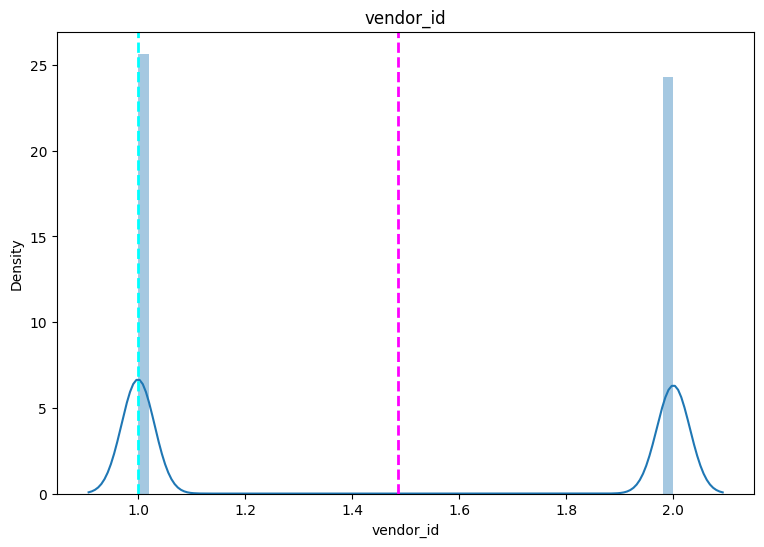

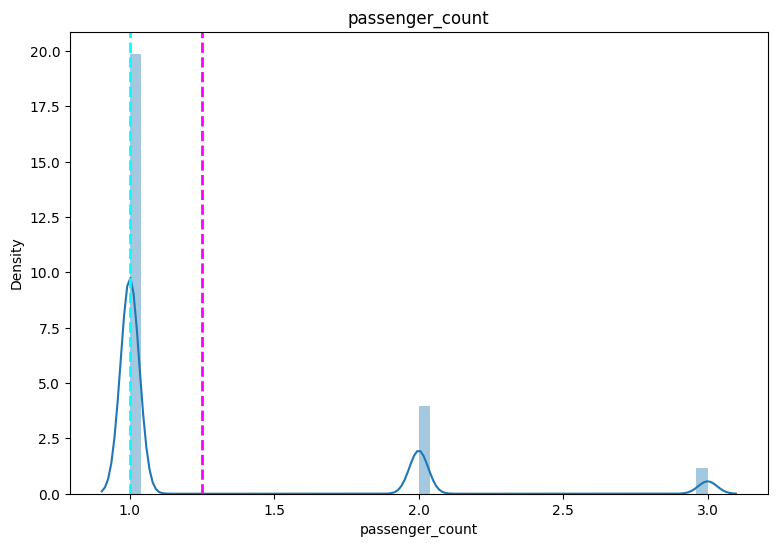

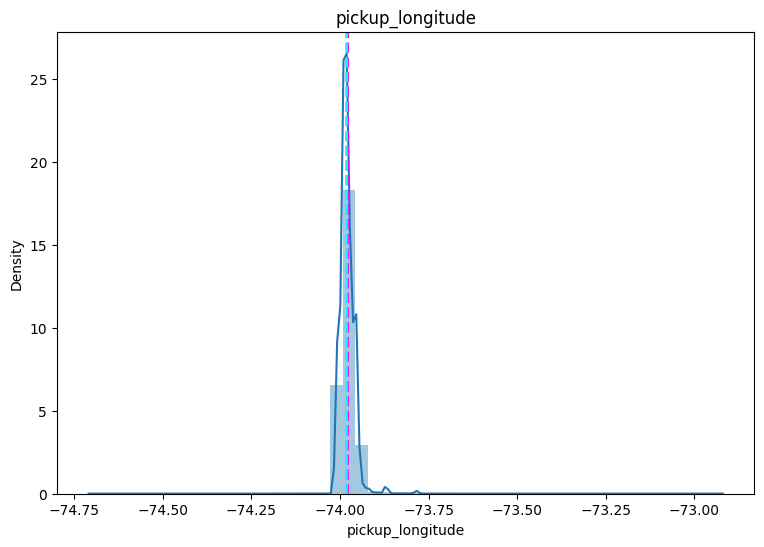

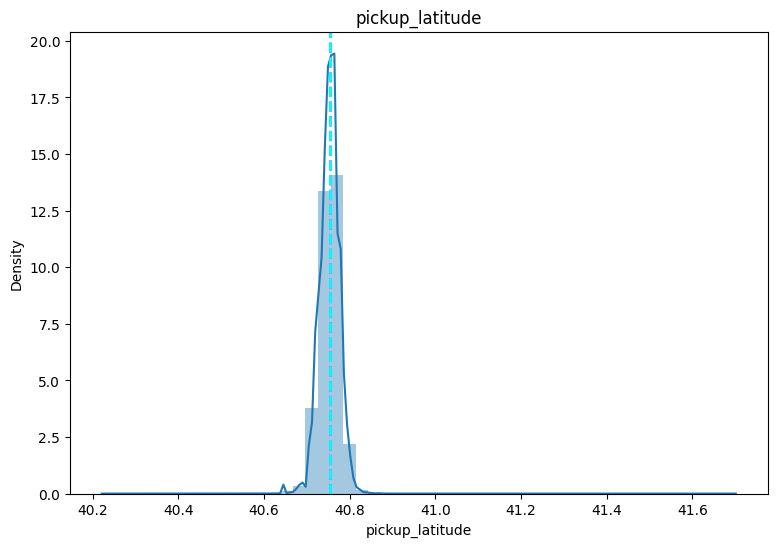

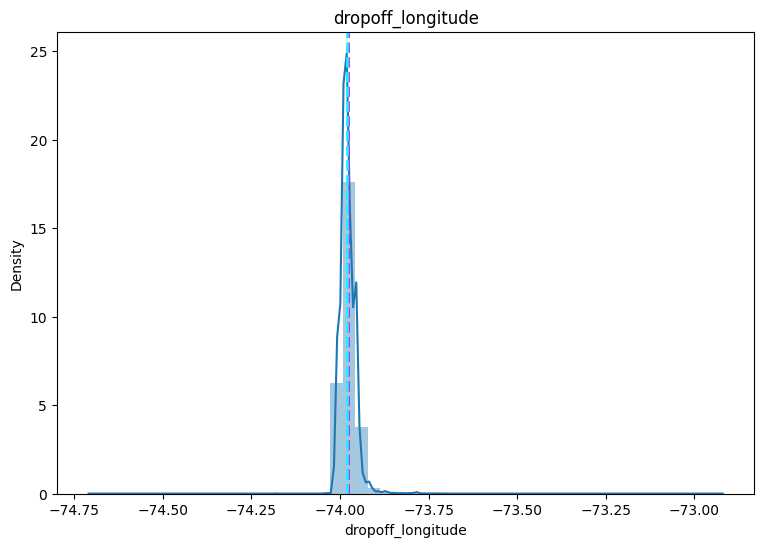

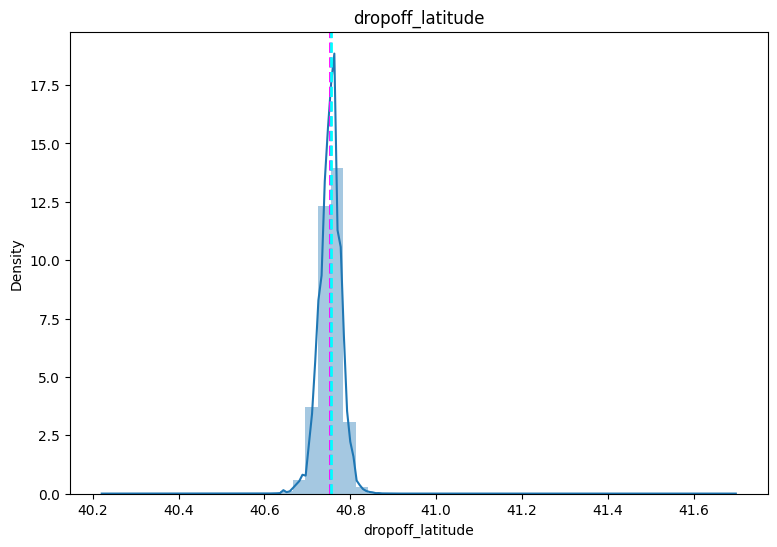

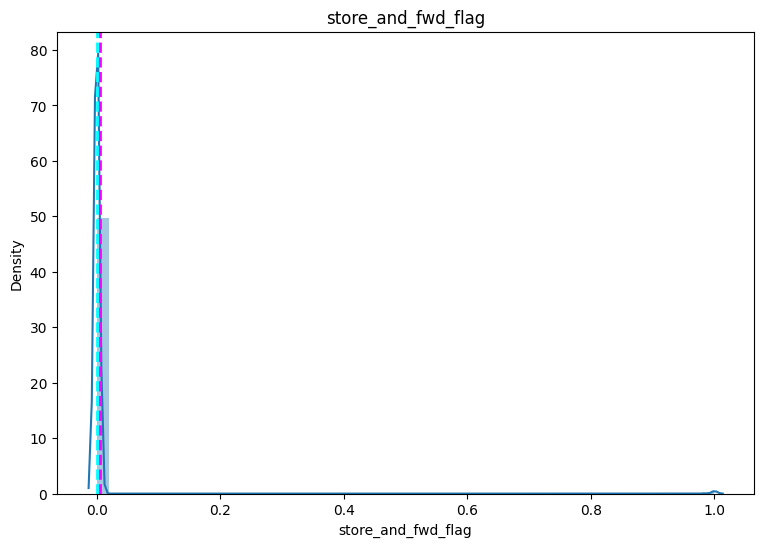

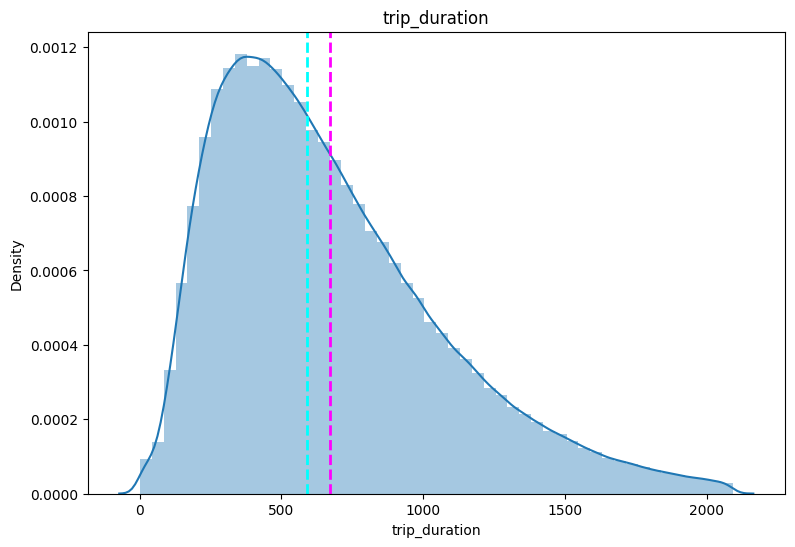

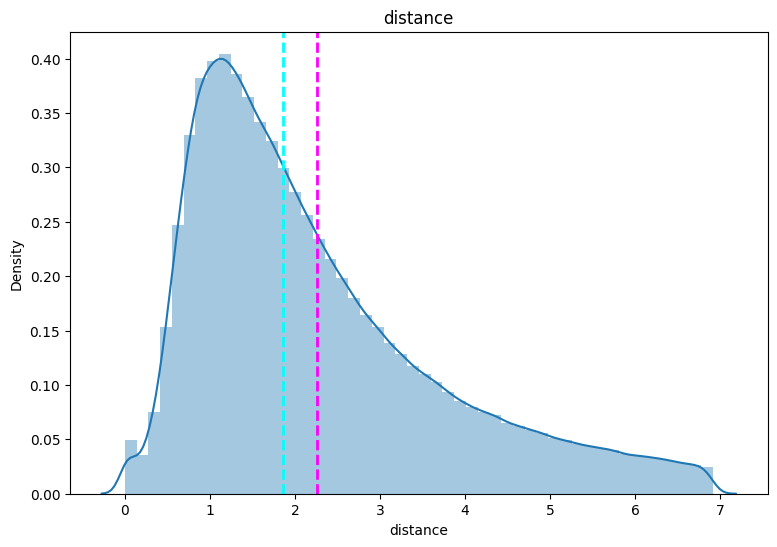

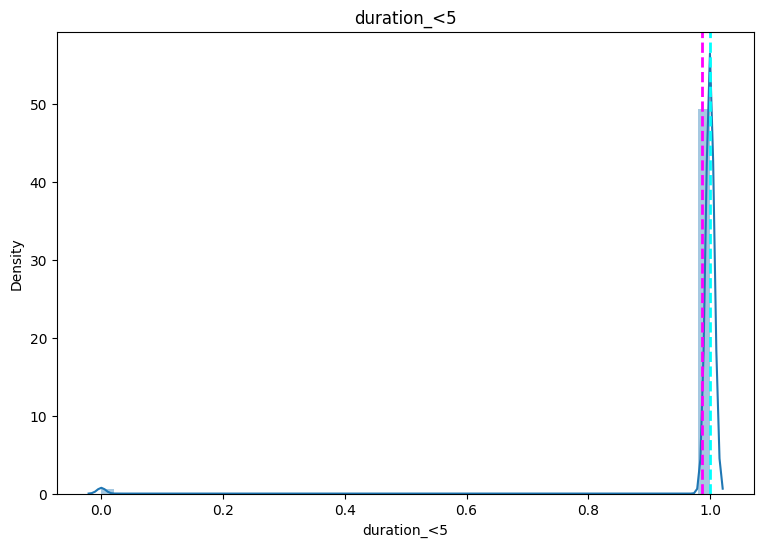

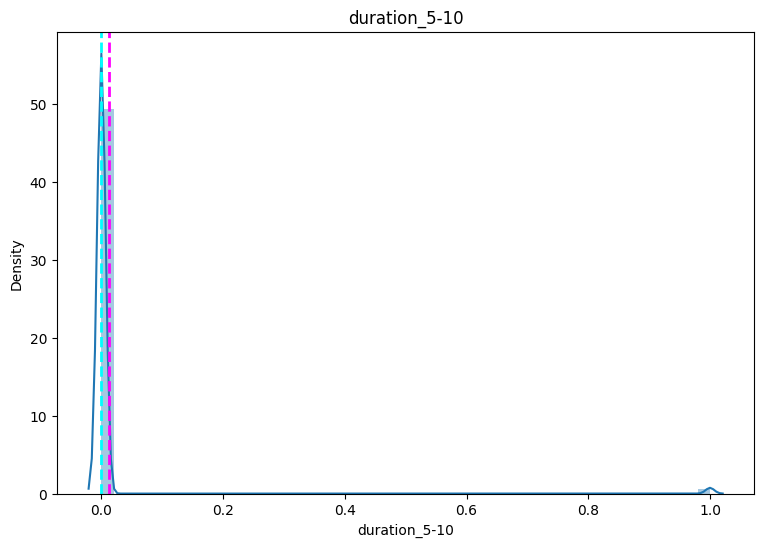

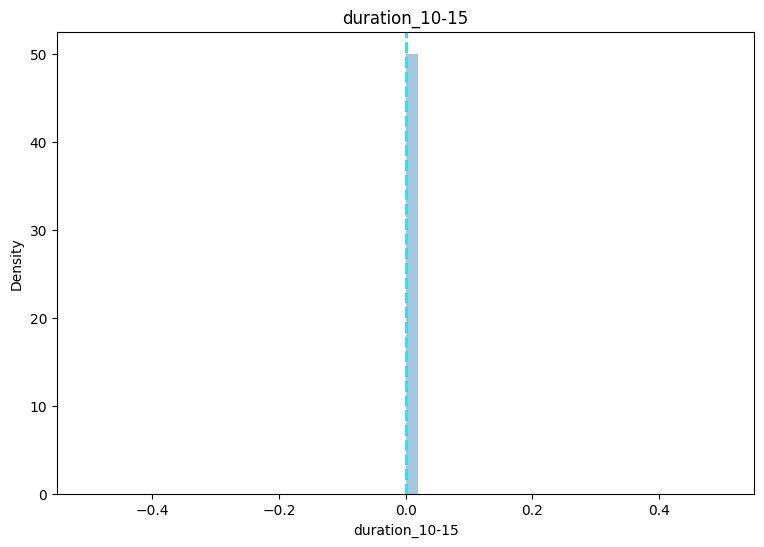

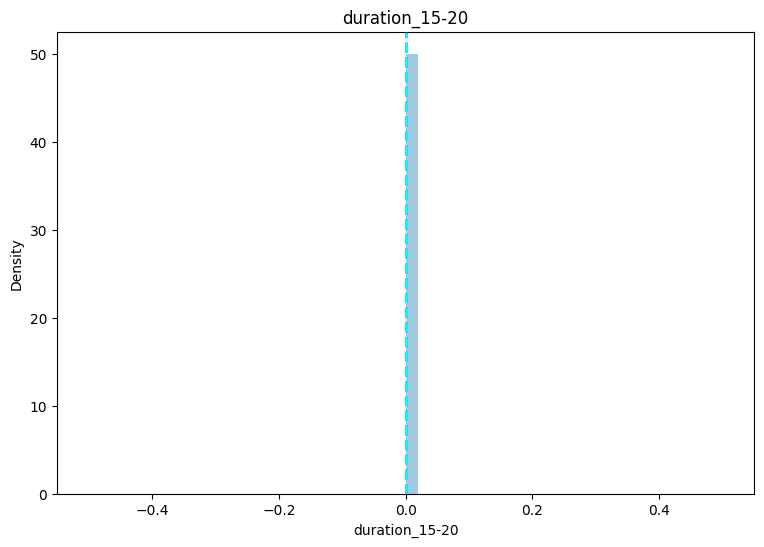

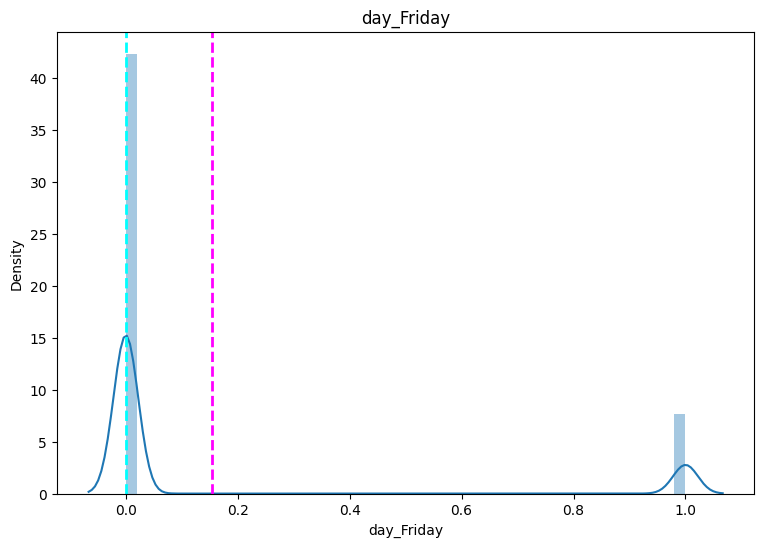

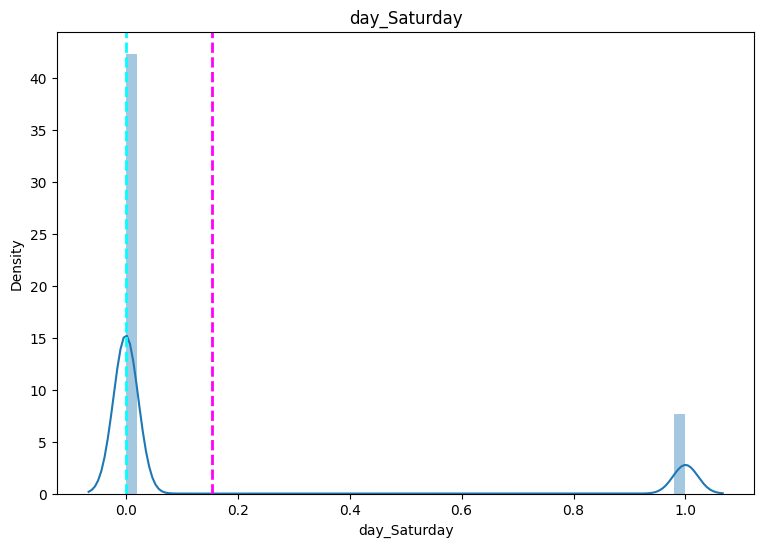

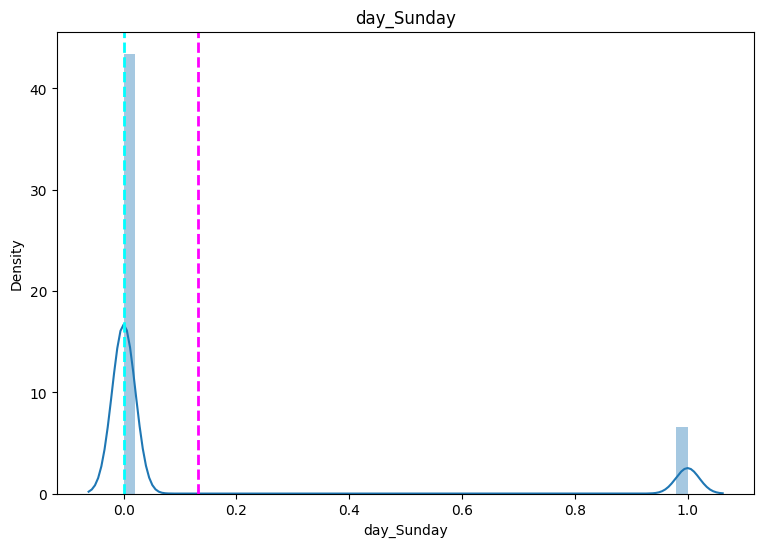

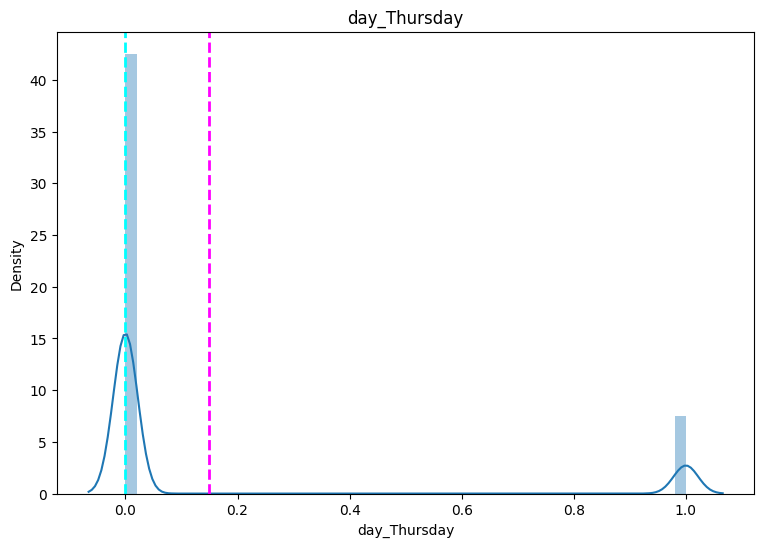

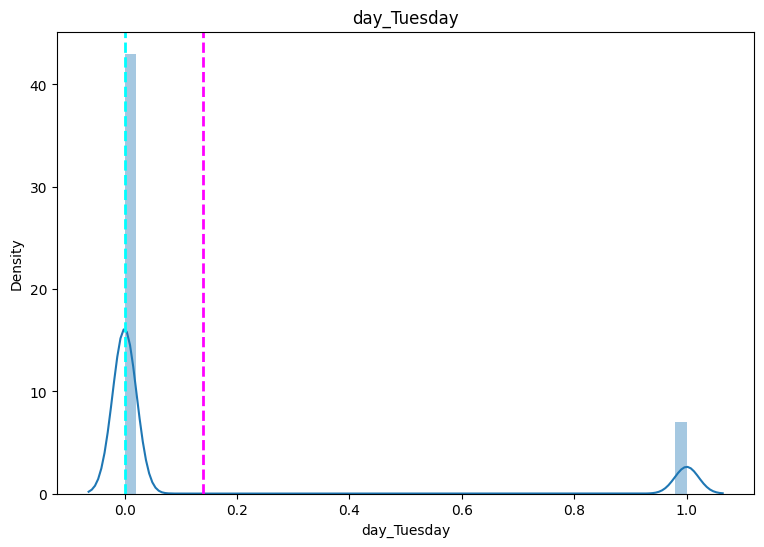

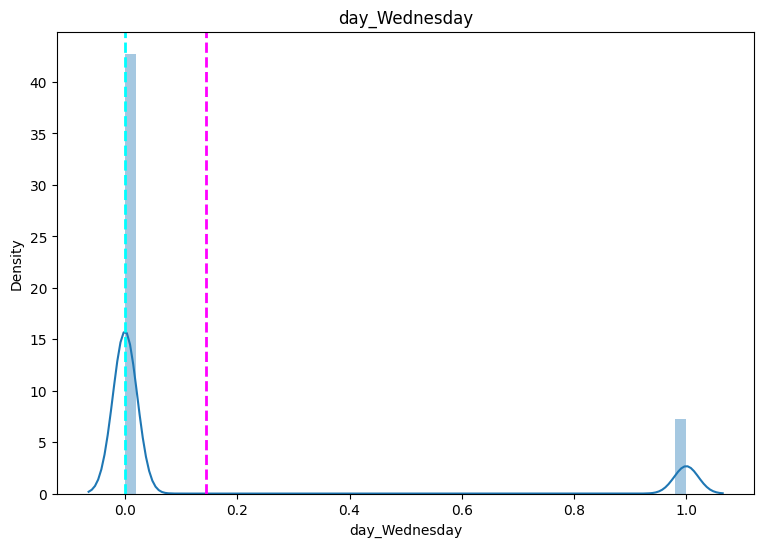

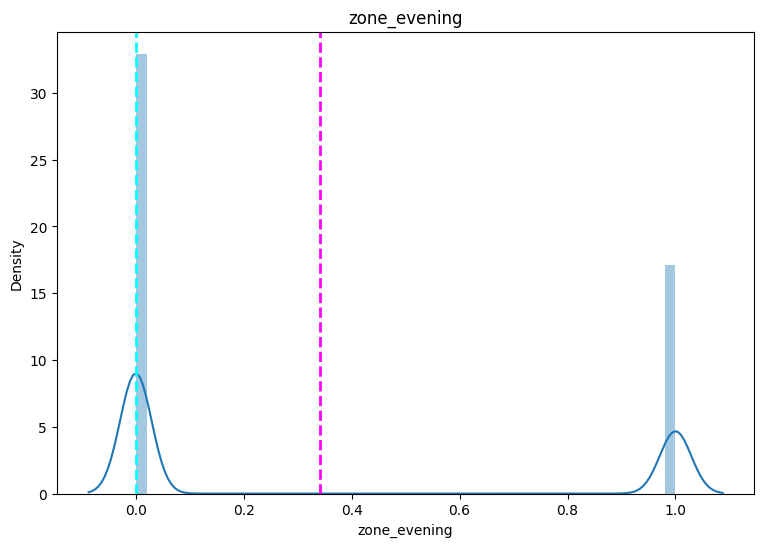

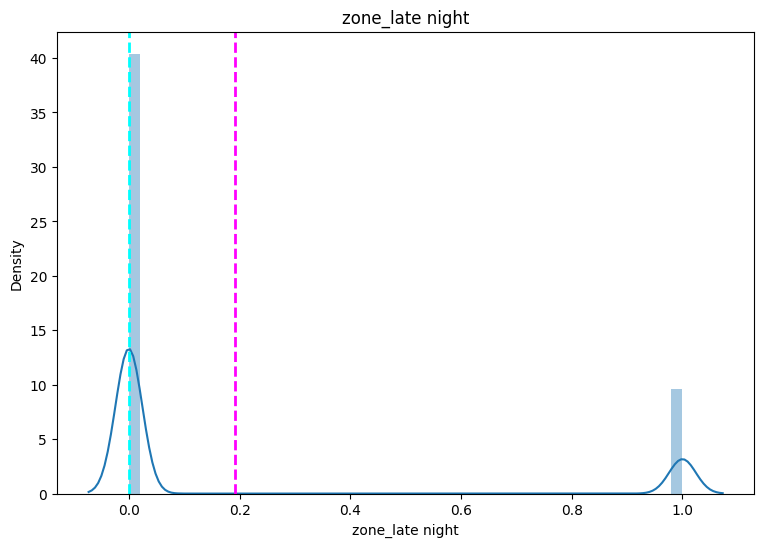

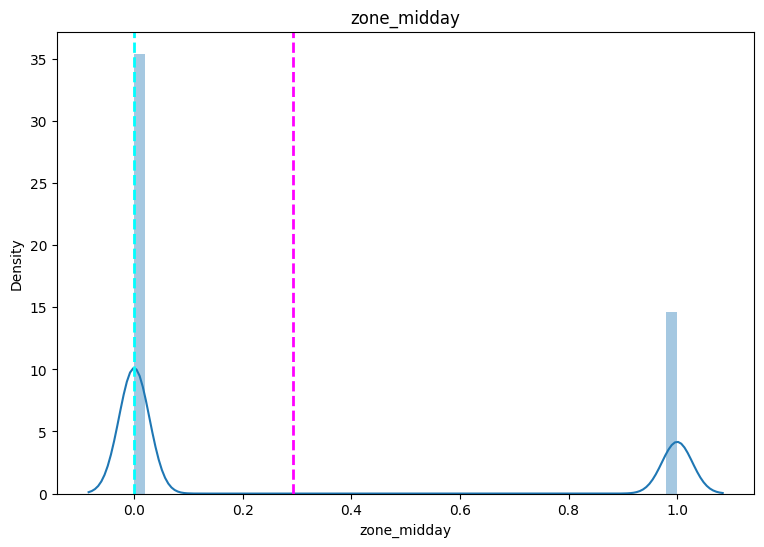

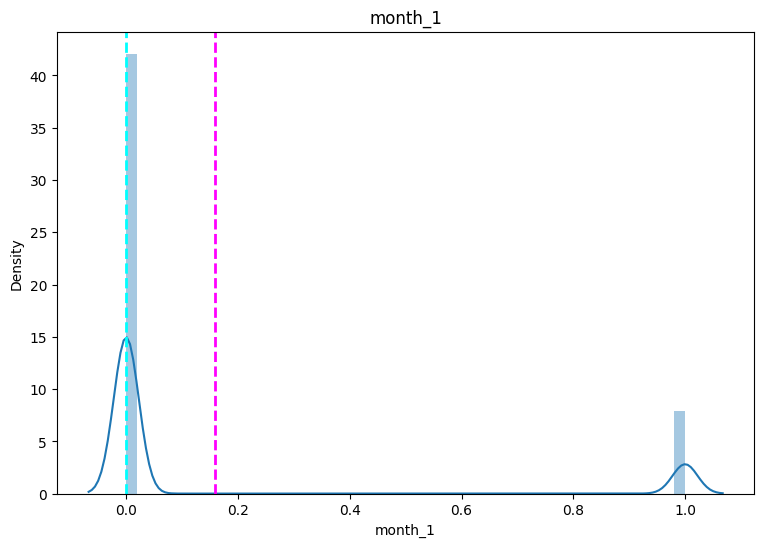

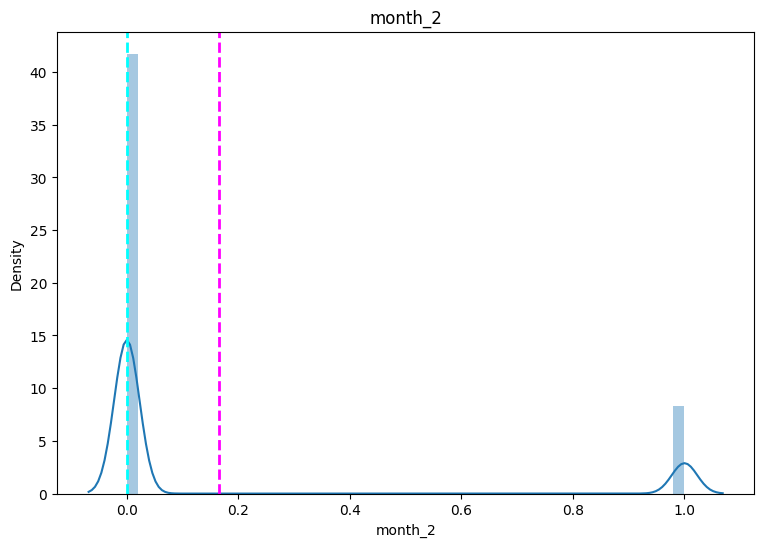

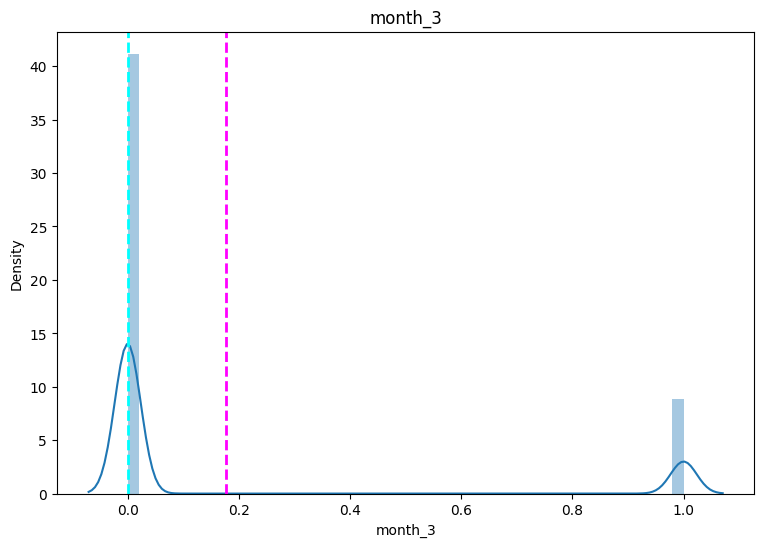

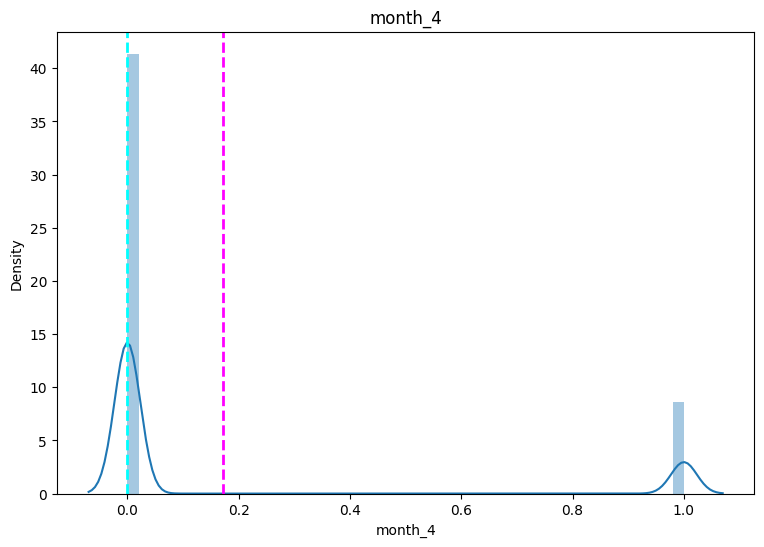

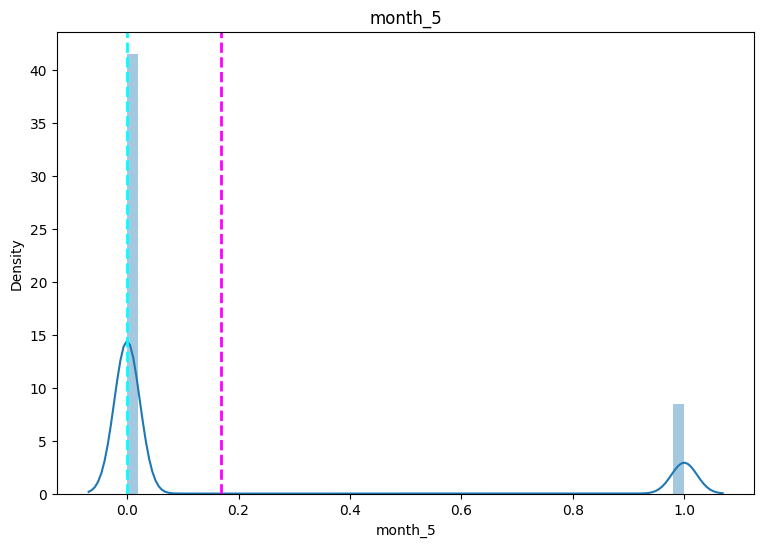

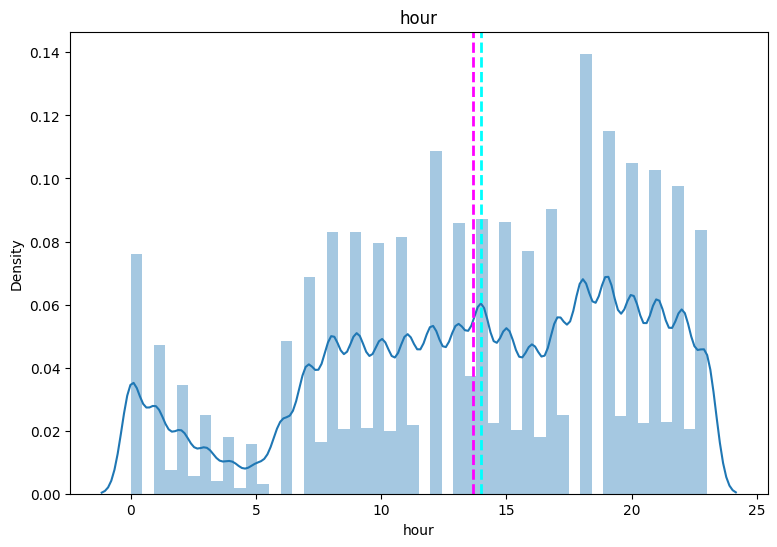

In [74]:
# Checking distribution of all features
for col in nyc_data_copy.columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  features=(nyc_data_copy[col])
  sns.distplot(nyc_data_copy[col])
  ax.axvline(features.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(features.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [75]:
# Transform Your data
nyc_data_copy['trip_duration']=nyc_data_copy['trip_duration'].apply(lambda x: np.log10(x+1))
nyc_data_copy['distance']=nyc_data_copy['distance'].apply(lambda x: np.log10(x+1))

In [76]:
nyc_data_copy.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,duration_<5,duration_5-10,duration_10-15,duration_15-20,day_Friday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,zone_evening,zone_late night,zone_midday,month_1,month_2,month_3,month_4,month_5,hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,2.658965,0.397683,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,17.0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,2.822168,0.448012,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,2.633468,0.395414,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,19.0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,2.639486,0.340164,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,13.0
7,2,1,-73.969276,40.797779,-73.922470,40.760559,0,3.190892,0.827045,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.4


Yes, i think trip duration and distance features of the dataset need to be transformed, becuase they are right skewed. We have used log transformation
to normalize the data. Other features followed normally distribution, symmetrical around y axis and some of them does not have any resemblace with normal distributed. They will scaled in further processing.

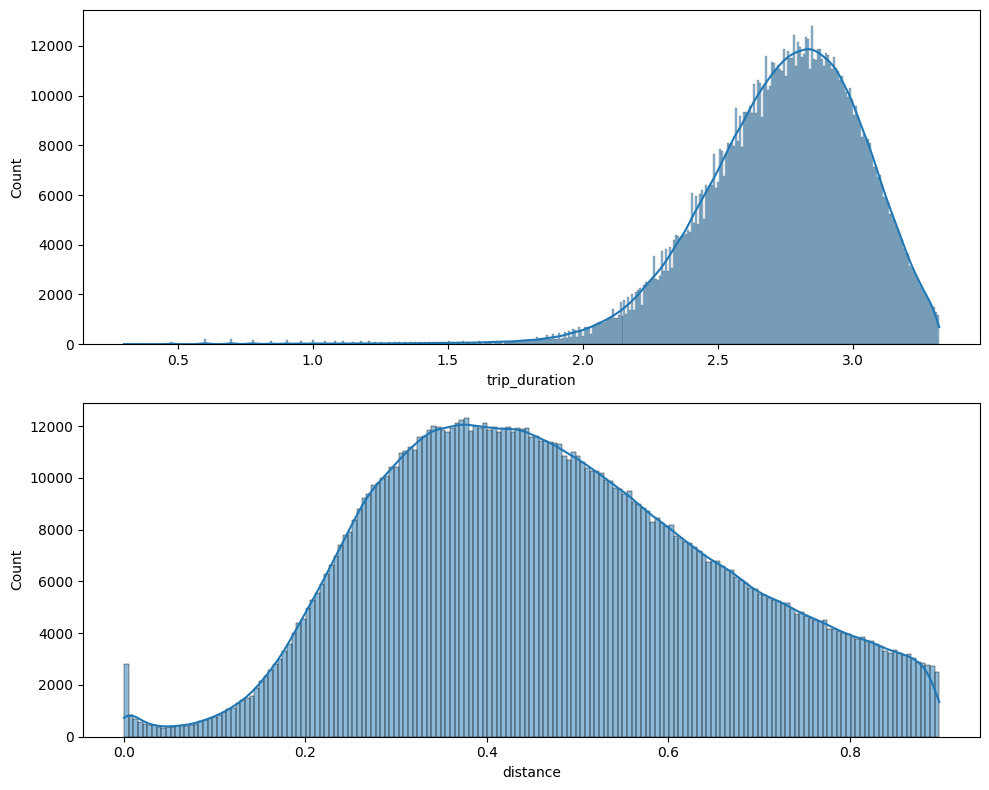

In [77]:
figure,ax=plt.subplots(2,1,figsize=(10,8))
sns.histplot(data=nyc_data_copy['trip_duration'],kde=True,ax=ax[0])

sns.histplot(data=nyc_data_copy['distance'],kde=True,ax=ax[1])
plt.tight_layout()

### 7. Dimensionality Reduction      

**Dimensionality Reduction does not required in this data becuase it is not considered a high dimension data.**

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [78]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [93]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=nyc_data_copy.drop('trip_duration',axis=1)
y=nyc_data_copy['trip_duration']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(909397, 27)
(227350, 27)


##### What data splitting ratio have you used and why?

The code divides the data into training and testing set using an 80:20 ratio. This indicates that 80% of the is utilised to train the model, while 20% is used to test the model.        

The ratio is determined by a number of parameters, including the size of the dataset, the complexity of the model, and the amount of computational resources available. In general a larger training set produces a stronger model, but a smaller testing set produces a higher variance in performance measurements. An 80:20 ratio is an excellent choice since it balances the trade-off between having enough data to train the model and having enough data to evaluate the model's performance.

### 9. Handling Imbalanced Dataset

**Data is not imbalance skipping this part also.**

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [80]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 6. Data Scaling

In [96]:
# Scaling your data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_train,y_train)

In [98]:
#Data in array
X_train[0:5]

array([[1.        , 0.        , 0.40352042, 0.36417435, 0.40243401,
        0.36319046, 0.        , 0.14163536, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.60869565],
       [1.        , 0.        , 0.41992735, 0.37299669, 0.42638428,
        0.37855008, 0.        , 0.38851646, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.39130435],
       [1.        , 0.5       , 0.40990756, 0.35763929, 0.42192493,
        0.36979283, 0.        , 0.61668346, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.    

##### Which method have you used to scale you data and why?

The data is scaled using Min-Max scaling or normalisation, which scales the data to a range between 0 and 1.

This approach was chosen because it preserve the distribution of the data the relationships between the features. Furthermore, many machine learning algorithms perform better with scaled data, particularly those that use distance-based metrics or optimisation functions.          
Scaling was done with Scikit-learn MinMaxScaler function.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [124]:
# ML Model - 1 Implementation
reg=LinearRegression()

# Fit the Algorithm
reg.fit(X_train,y_train)
#predict the target values of train data
y_pred_train=reg.predict(X_train)
#predict the target values of test data
y_pred_test=reg.predict(X_test)
#Evaluate the model using MSE and R2
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

print('Linear Regression Mean Squared Error:', mse_test)
print('Linear Regression R2 Score:', r2_test)


## RIDGE REGRESSION
ridge=Ridge()
ridge.fit(X_train,y_train)
#predict the target values of train data
ridge_pred_train=ridge.predict(X_train)
#predict the target values of test data
ridge_pred_test=ridge.predict(X_test)
#Evaluate the model using metrics
mse_ridge_train=mean_squared_error(y_train,ridge_pred_train)
mse_ridge_test=mean_squared_error(y_test,ridge_pred_test)
r2_ridge_train=r2_score(y_train,ridge_pred_train)
r2_ridge_test=r2_score(y_test,ridge_pred_test)

print('Ridge Mean Squared Error:', mse_ridge_test)
print('Ridge R2 Score:', r2_ridge_test)


## LASSO RIGRESSION
lasso=Lasso(alpha=0.0001, max_iter=3000)
# Fit the lasso model on the training data
lasso.fit(X_train,y_train)
#predict the target values of train data
lasso_pred_train=lasso.predict(X_train)
#predict the target values of test data
lasso_pred_test=lasso.predict(X_test)
#Evaluate the model using metrics
mse_lasso_train=mean_squared_error(y_train,lasso_pred_train)
mse_lasso_test=mean_squared_error(y_test,lasso_pred_test)
r2_lasso_train=r2_score(y_train,lasso_pred_train)
r2_lasso_test=r2_score(y_test,lasso_pred_test)

print('Lasso Mean Squared Error:', mse_lasso_test)
print('Lasso R2 score:', r2_lasso_test)



Linear Regression Mean Squared Error: 0.03729665727248573
Linear Regression R2 Score: 0.5726523831810395
Ridge Mean Squared Error: 0.03729681766015921
Ridge R2 Score: 0.5726505454482496
Lasso Mean Squared Error: 0.03740625973049732
Lasso R2 score: 0.571396550818194


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [125]:
## Checking the coefficients
print('The Coefficient Obtain From LinearRegression Model', reg.coef_)
print('The Coefficient Obtain From Ridge Model', ridge.coef_)
print('The Coefficient Obtain From Lasso Model', lasso.coef_)

### Checking the intercepts
print('The Intercept Obtain From LinearRegression Model', reg.intercept_)
print('The Intercept Obtain From Ridge Model', ridge.intercept_)
print('The Intercept Obtain From Lasso Model', lasso.intercept_)

The Coefficient Obtain From LinearRegression Model [ 1.95910617e-03  2.10099562e-02 -1.17023441e+00  3.98120356e-01
 -1.29435303e+00 -8.40961544e-01 -3.34398993e-03  1.04063115e+00
 -1.16157455e-01  1.16157455e-01  1.44328993e-15 -2.38697950e-15
  3.97727821e-02  2.70416854e-04 -3.94416781e-02  4.67822303e-02
  3.66831244e-02  4.52149834e-02  2.31502979e-02 -4.30475798e-02
  8.20870573e-02 -2.26819058e-02 -1.81173718e-02 -1.90960422e-02
 -4.89289372e-03 -1.05185214e-03  3.76578640e-02]
The Coefficient Obtain From Ridge Model [ 1.95816551e-03  2.10151658e-02 -1.15889376e+00  3.87178351e-01
 -1.29355909e+00 -8.33538688e-01 -3.34843439e-03  1.04058681e+00
 -1.16171838e-01  1.16171838e-01  0.00000000e+00  0.00000000e+00
  3.97745589e-02  2.75171551e-04 -3.94408123e-02  4.67845950e-02
  3.66842723e-02  4.52168819e-02  2.31516801e-02 -4.30484706e-02
  8.20903133e-02 -2.26811232e-02 -1.81139100e-02 -1.90938035e-02
 -4.89222200e-03 -1.05261046e-03  3.76704692e-02]
The Coefficient Obtain From L

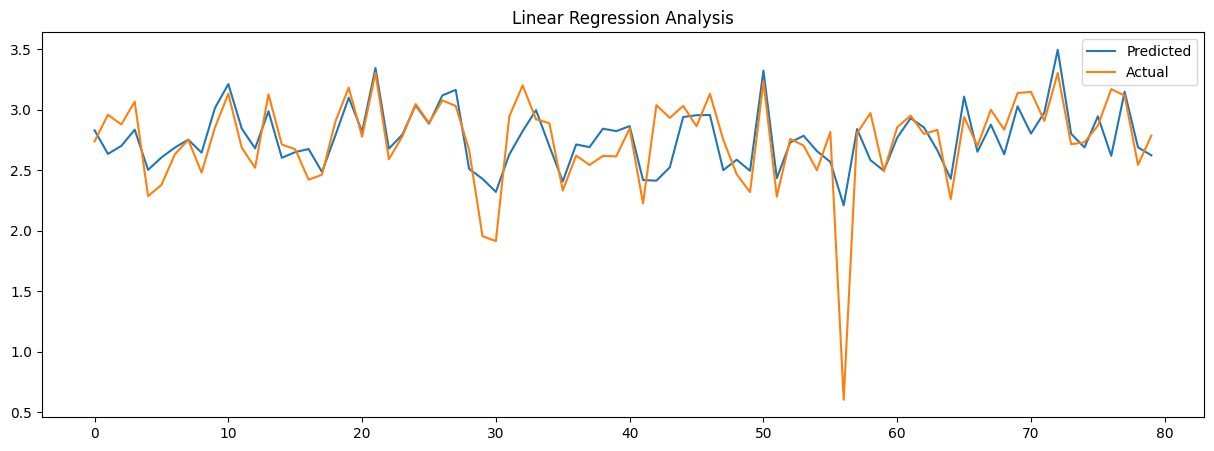

In [126]:
# Visualizing evaluation Metric Score chart
## plot the predicted Vs actual values
### Linear Regression Analysis
plt.figure(figsize=(15,5))
plt.plot(y_pred_test[:80])
plt.plot(np.array(y_test[:80]))
plt.legend(['Predicted','Actual'])
plt.title("Linear Regression Analysis")
plt.show()

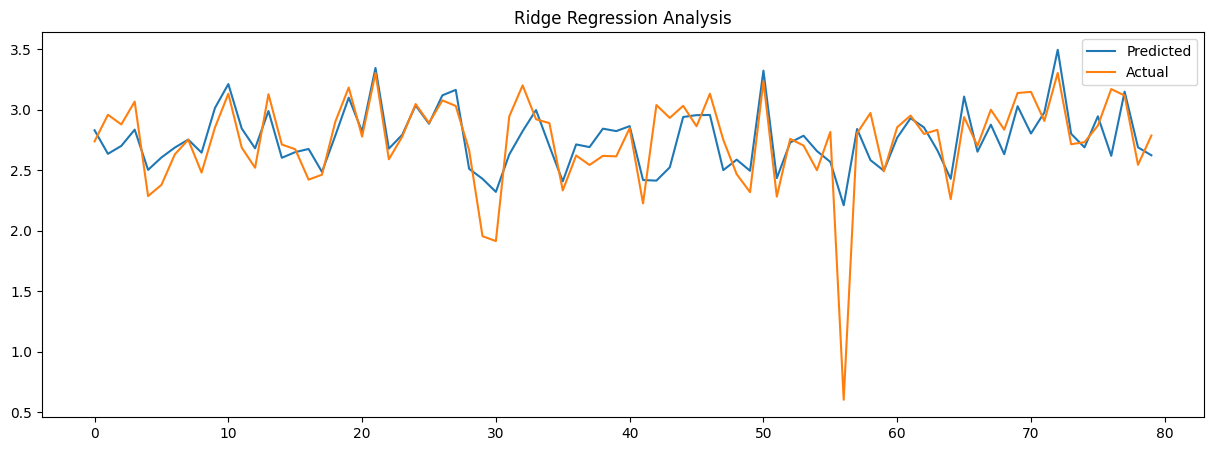

In [127]:
# Ridge Regression Analysis
plt.figure(figsize=(15,5))
plt.plot(ridge_pred_test[:80])
plt.plot(np.array(y_test[:80]))
plt.legend(['Predicted','Actual'])
plt.title('Ridge Regression Analysis')
plt.show()

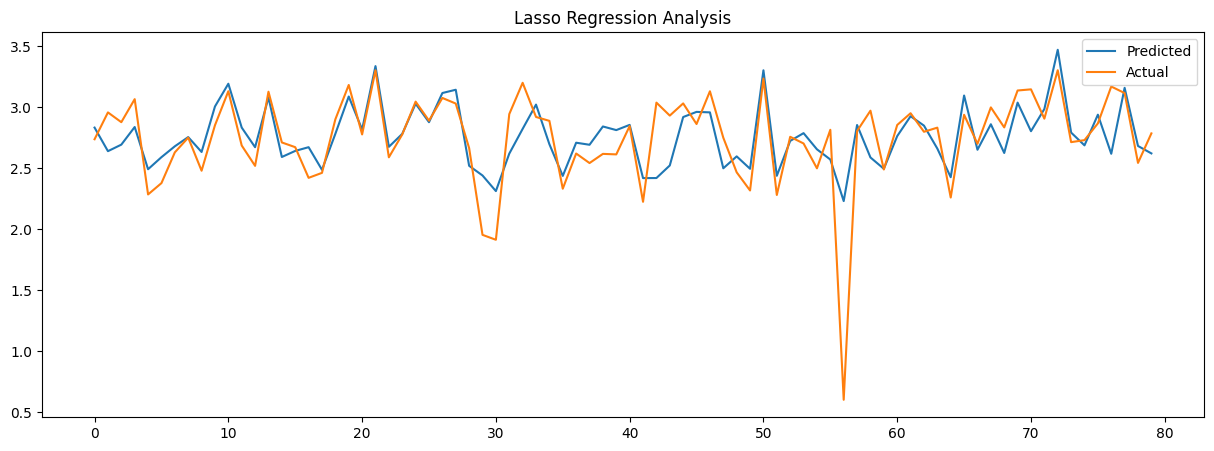

In [128]:
# Lasso Regression Analysis
plt.figure(figsize=(15,5))
plt.plot(lasso_pred_test[:80])
plt.plot(np.array(y_test[:80]))
plt.legend(['Predicted','Actual'])
plt.title("Lasso Regression Analysis")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [88]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [91]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [92]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***